In [1]:
from result_analysis import show_all_metrics_pred, show_all_metrics_fair, show_metric_alg, show_pred_metrics, show_fair_metrics, show_metric_aggregated
from result_analysis import create_trade_off_gif
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
algorithms = ['PL', 'STC', 'CC', 'HLNC', 'OBNC', 'BE']

experiments = ['phishing_having_IP_Address', 'bank_housing', 'monks1_attr3', 'biodeg_V25', 
                'credit_A1', 'sick_referral_source_other', 'vote_immigration', 'ads_local', 'churn_voice_mail_plan']

noise_types = ['random', 'flip', 'bias', 'balanced_bias']

In [3]:
pred_metrics = ['accuracy', 'roc_auc']

fair_metrics = [
        'auc_difference',
        'equal_opportunity_difference', 
        'predictive_equality_difference',
        'demographic_parity_difference',
        'equalized_odds_difference']

metrics = pred_metrics + fair_metrics

In [4]:
runs = {}
for noise_type in noise_types:
    runs[noise_type] = {}
    for exp in experiments:
        for alg in algorithms:
            runs[noise_type][f'{exp}_{alg}'] = pd.read_csv(f'../noiseinjection_results/{noise_type}/{exp}_{alg}.csv').fillna(0)

# Random Noise

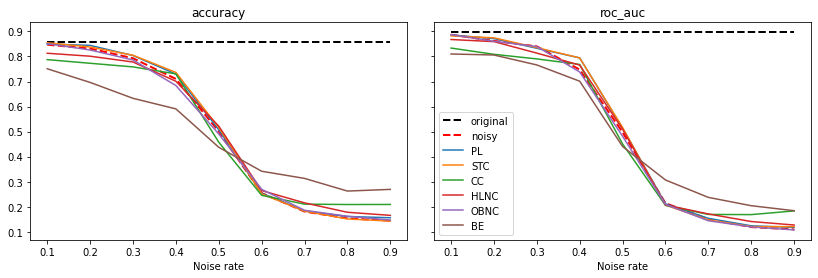

In [5]:
show_all_metrics_pred('random', 'original', algorithms, experiments, runs)

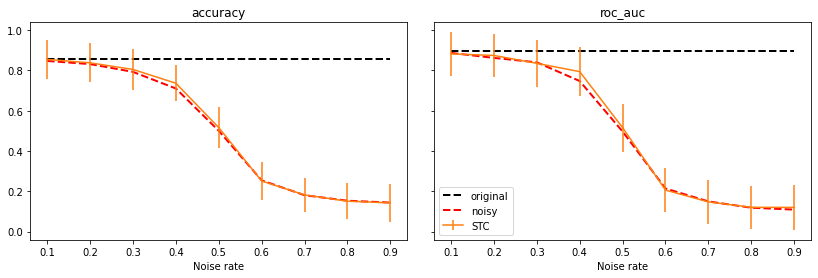

In [6]:
for alg in ['STC']:
    show_all_metrics_pred('random', 'original', [alg], experiments, runs)

# Label flipping

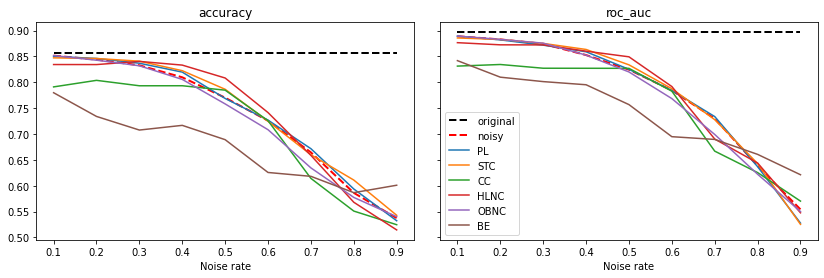

In [7]:
show_all_metrics_pred('flip', 'original', algorithms, experiments, runs)

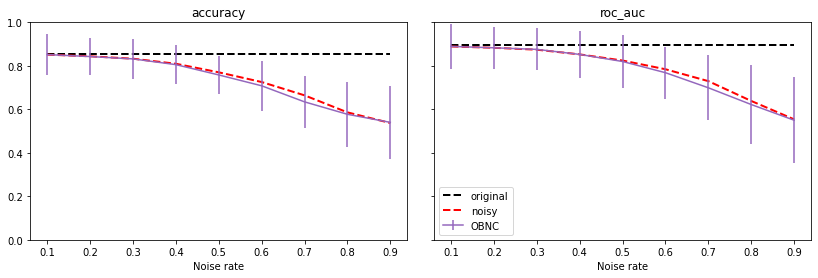

In [7]:
for alg in ['OBNC']:
    show_all_metrics_pred('flip', 'original', [alg], experiments, runs, True)

# Positive Bias

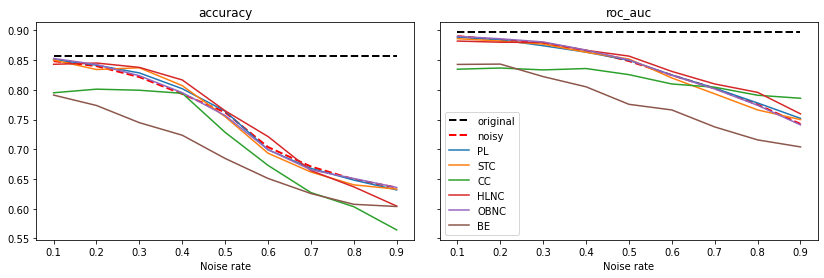

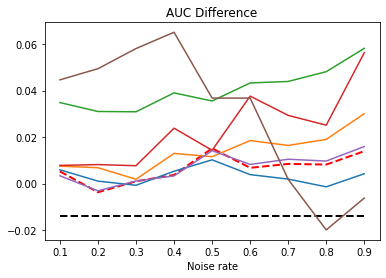

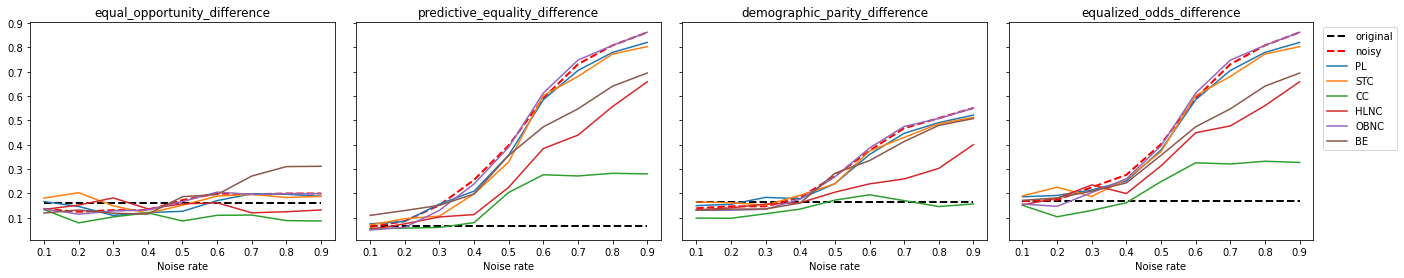

In [9]:
show_all_metrics_pred('bias', 'original', algorithms, experiments, runs)
show_metric_aggregated('bias', 'original', 'auc_difference', plt.gca(), f'AUC Difference', algorithms, experiments, runs)
show_all_metrics_fair('bias', 'original', algorithms, experiments, runs)

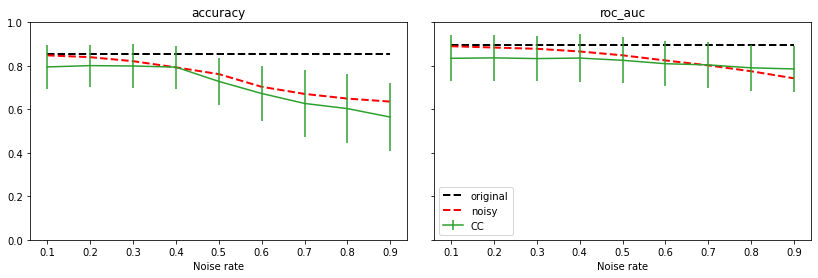

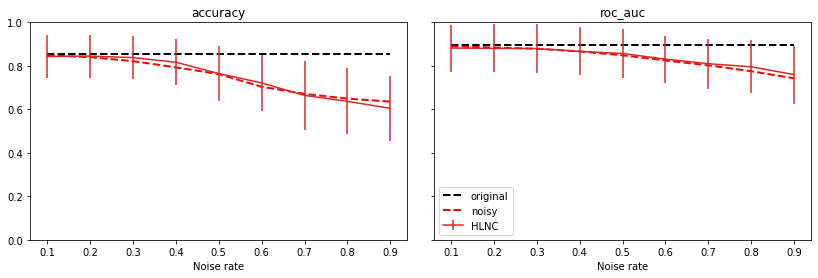

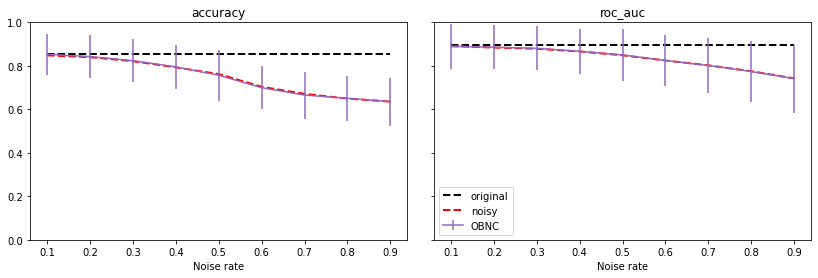

In [9]:
for alg in ['CC','HLNC','OBNC']:
    show_all_metrics_pred('bias', 'original', [alg], experiments, runs, True)

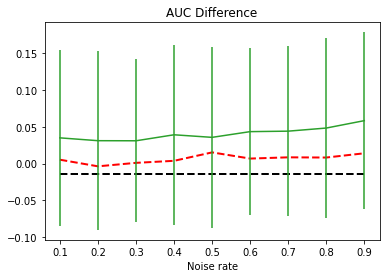

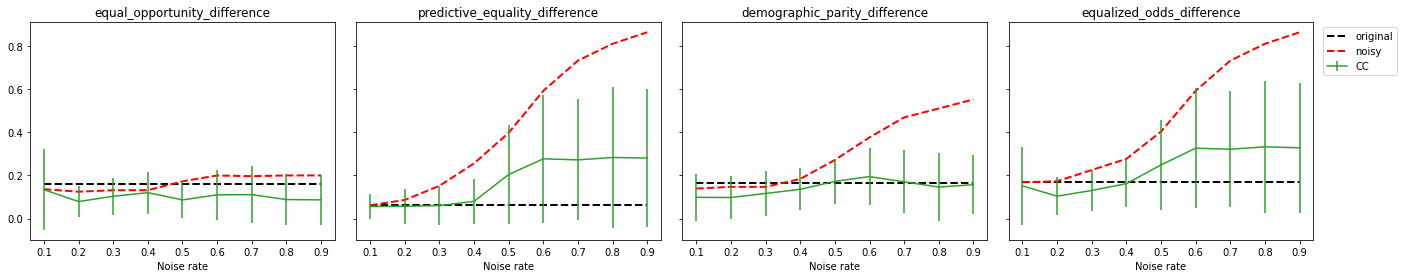

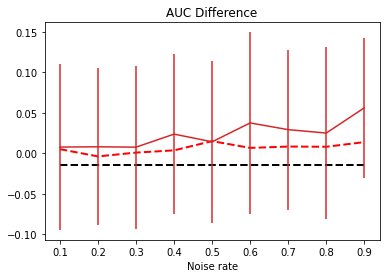

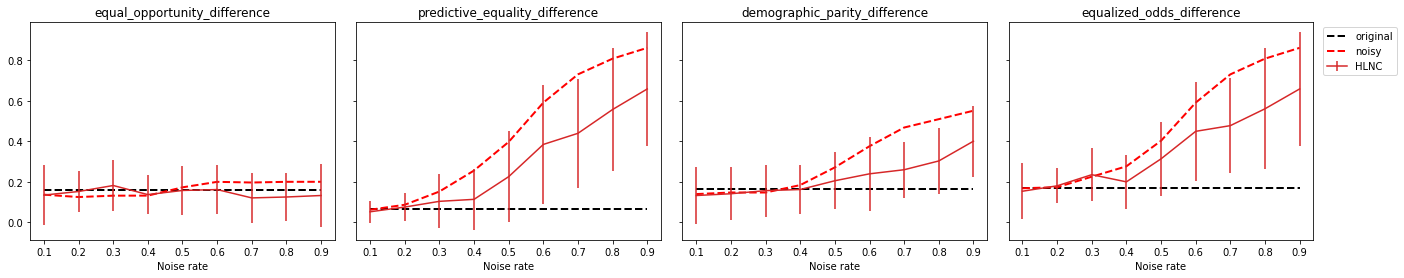

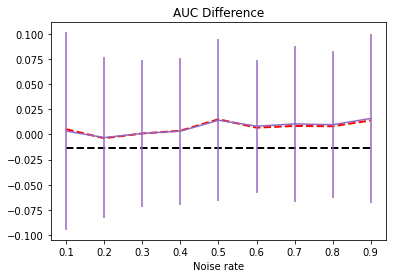

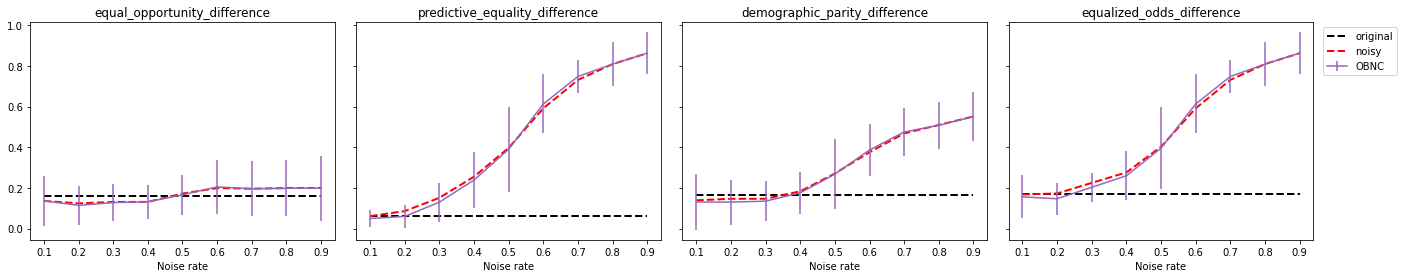

In [10]:
for alg in ['CC','HLNC', 'OBNC']:
    show_metric_aggregated('bias', 'original', 'auc_difference', plt.gca(), f'AUC Difference', [alg], experiments, runs)
    show_all_metrics_fair('bias', 'original', [alg], experiments, runs)

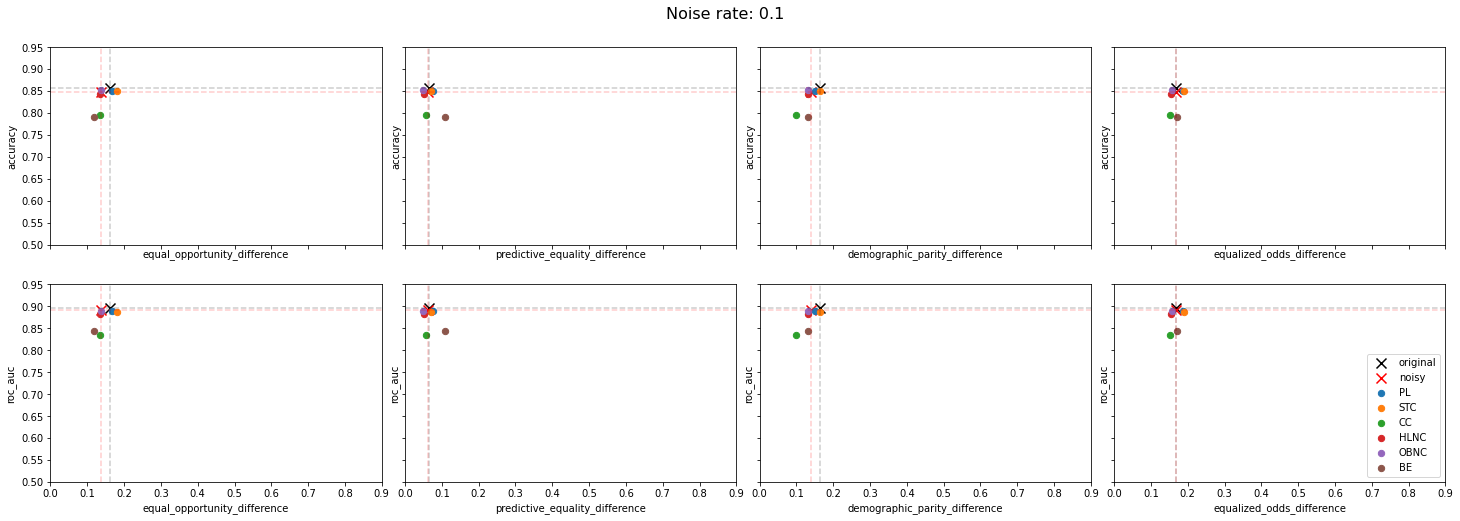

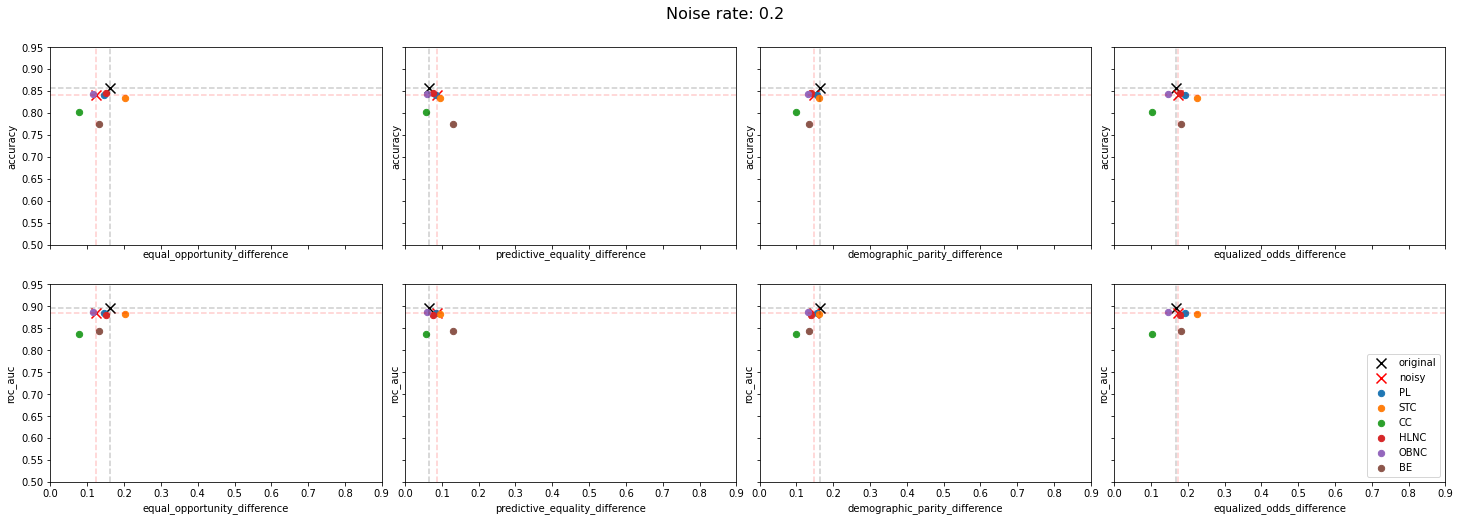

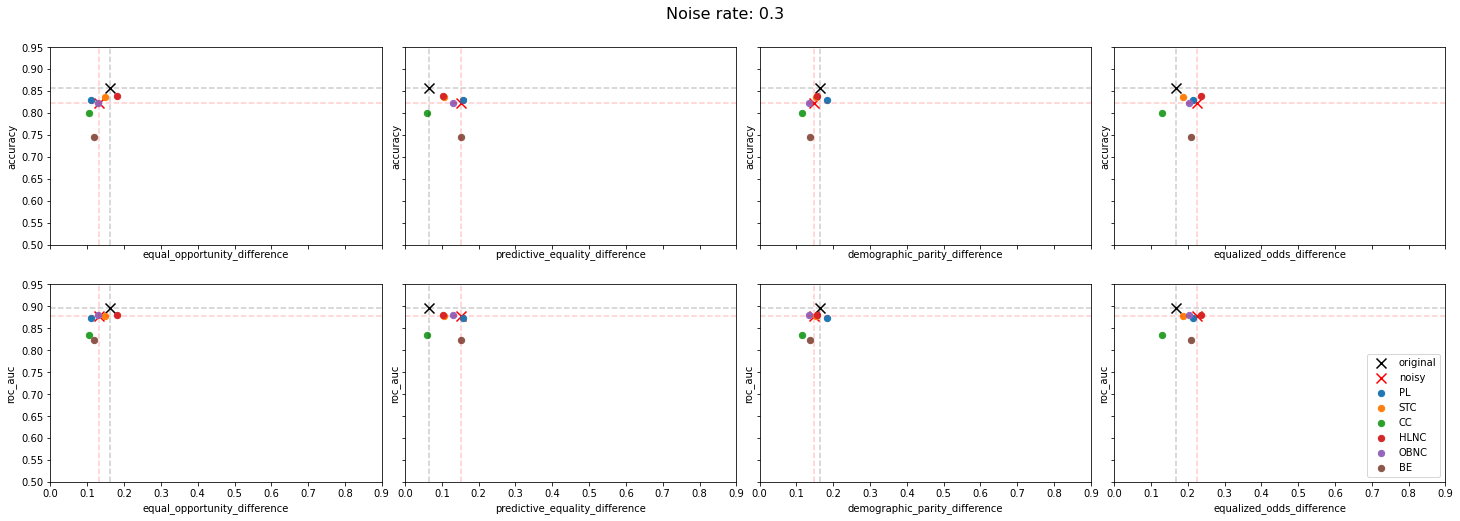

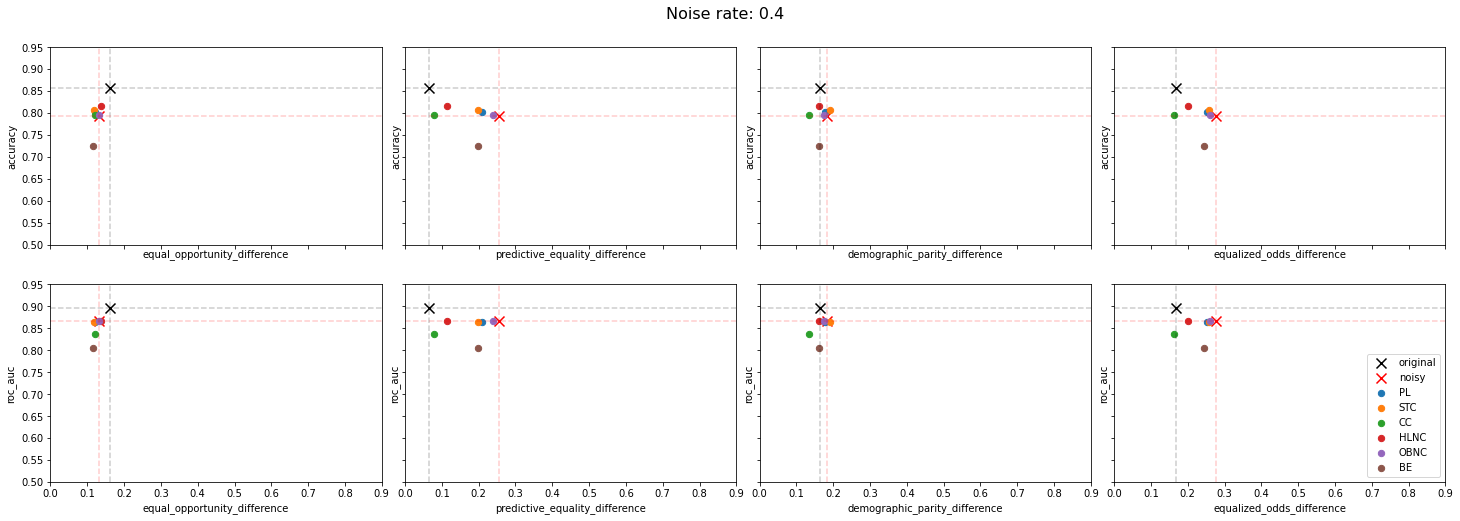

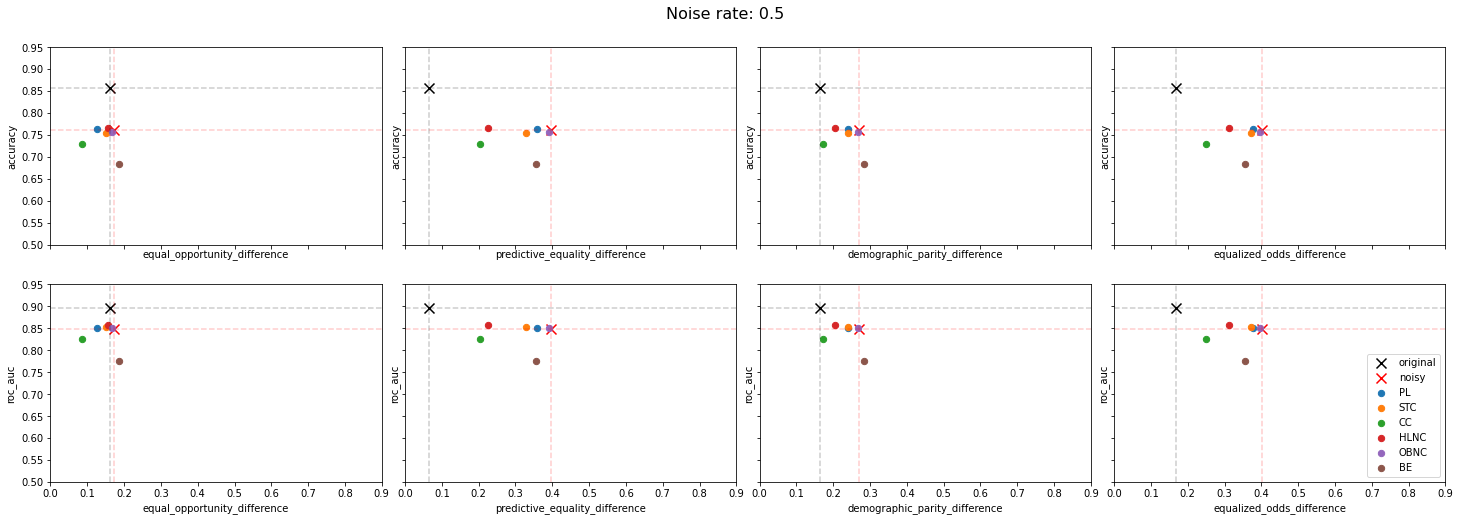

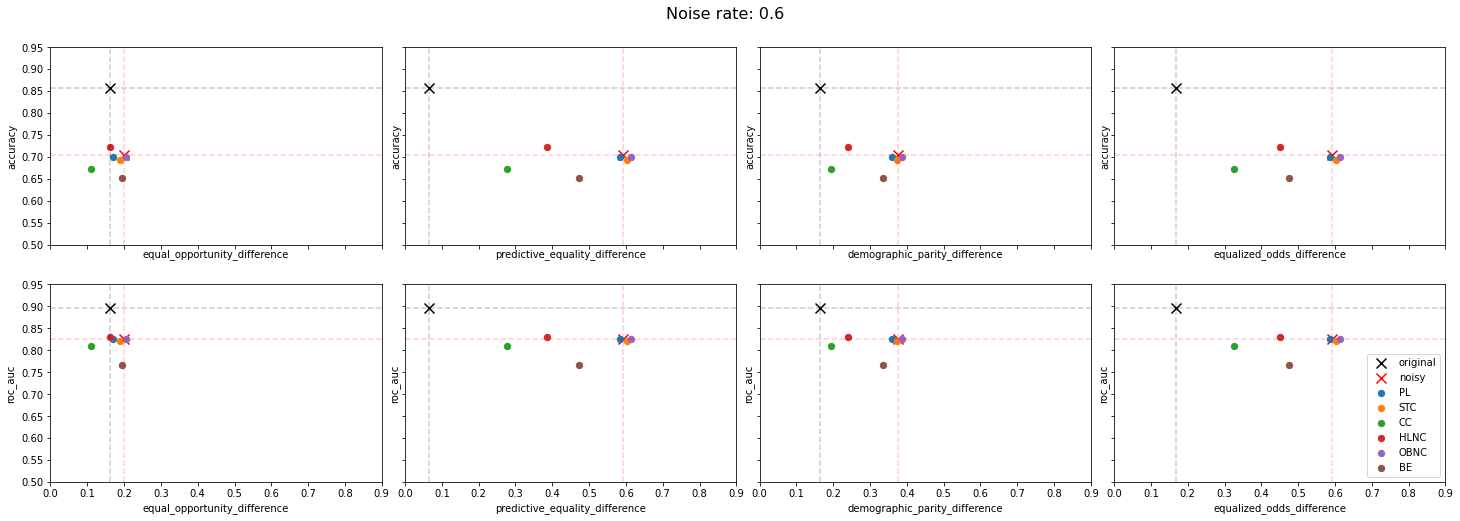

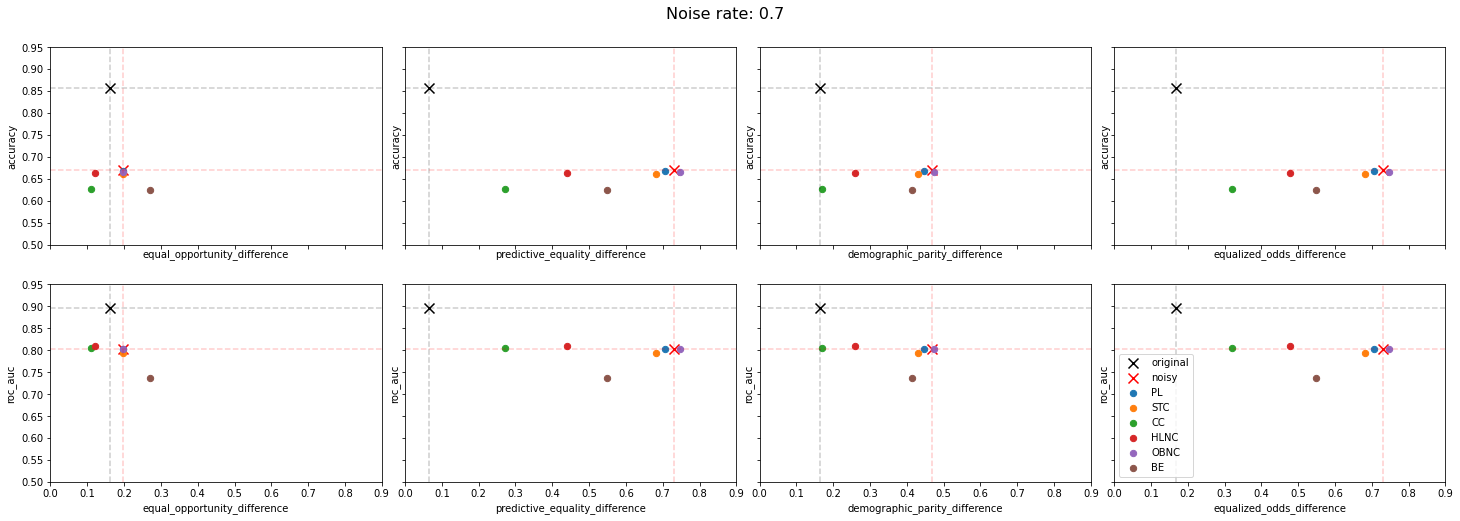

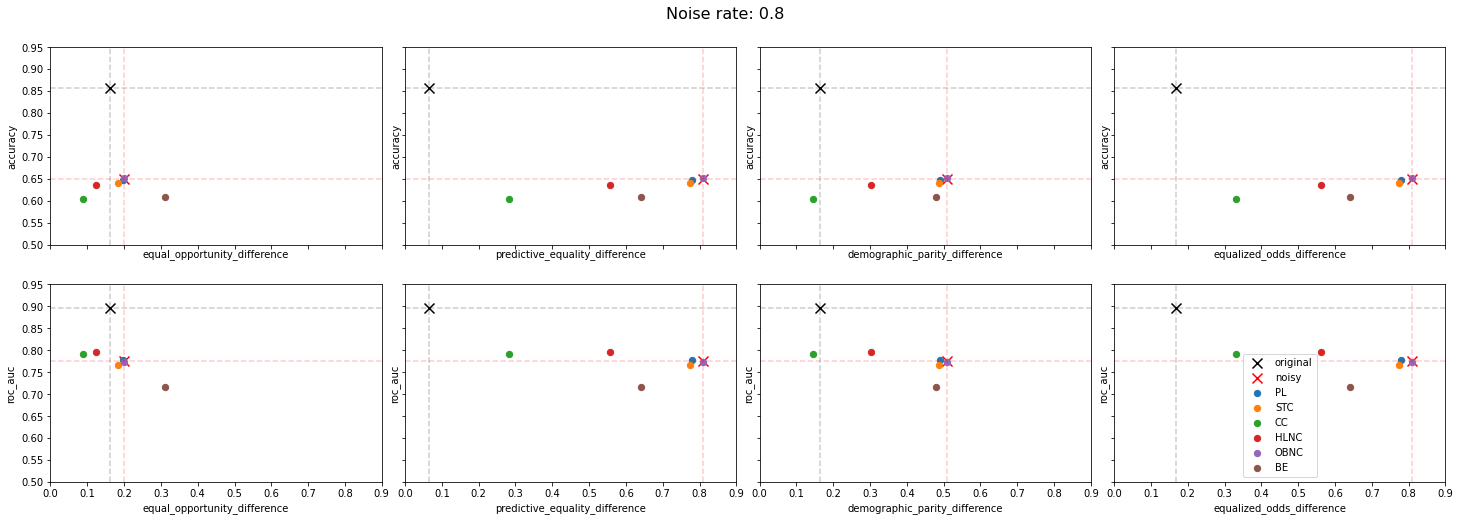

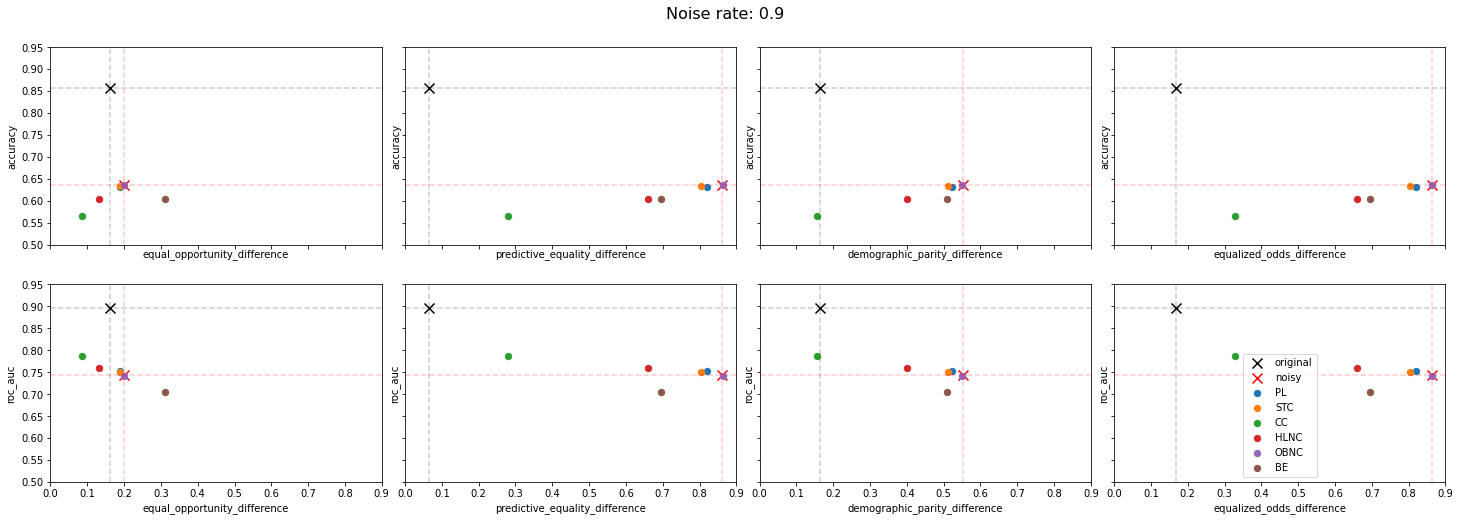

In [12]:
create_trade_off_gif('bias', 'original', algorithms, experiments, runs, xlimit=(0, 0.9), ylimit=(0.5, 0.95))

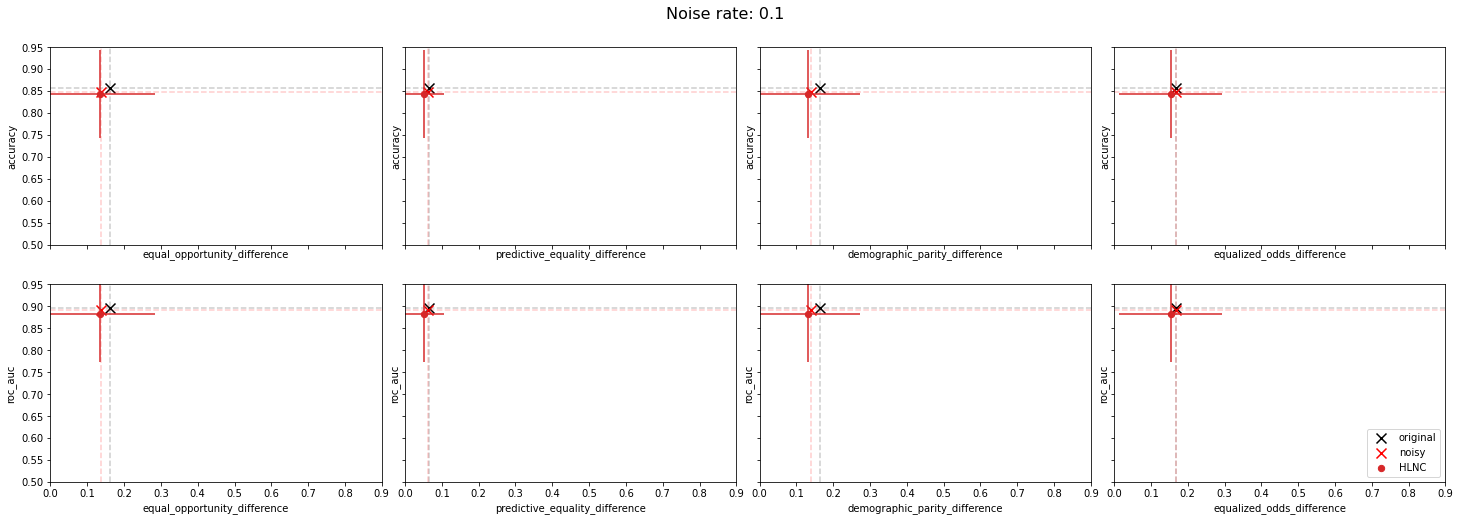

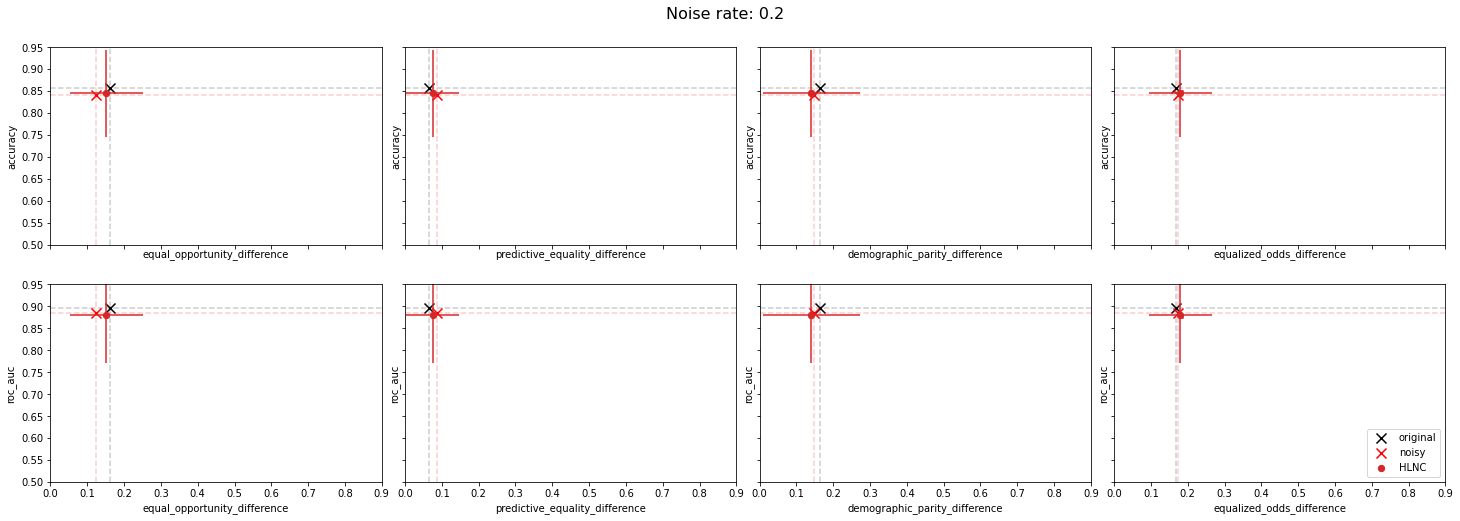

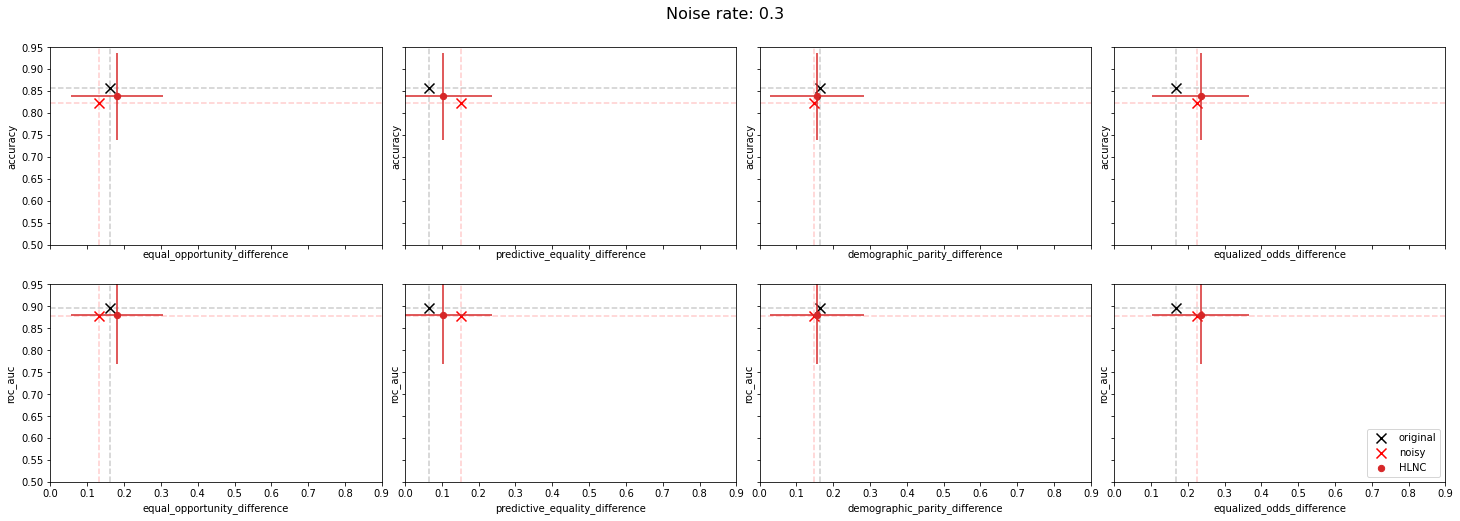

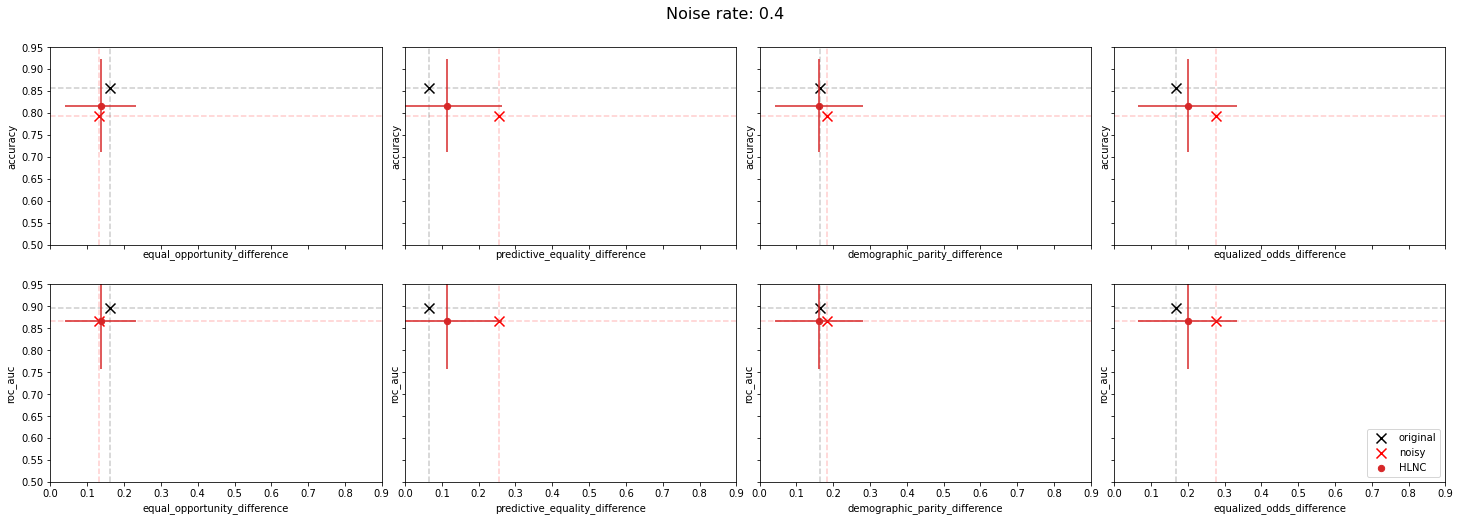

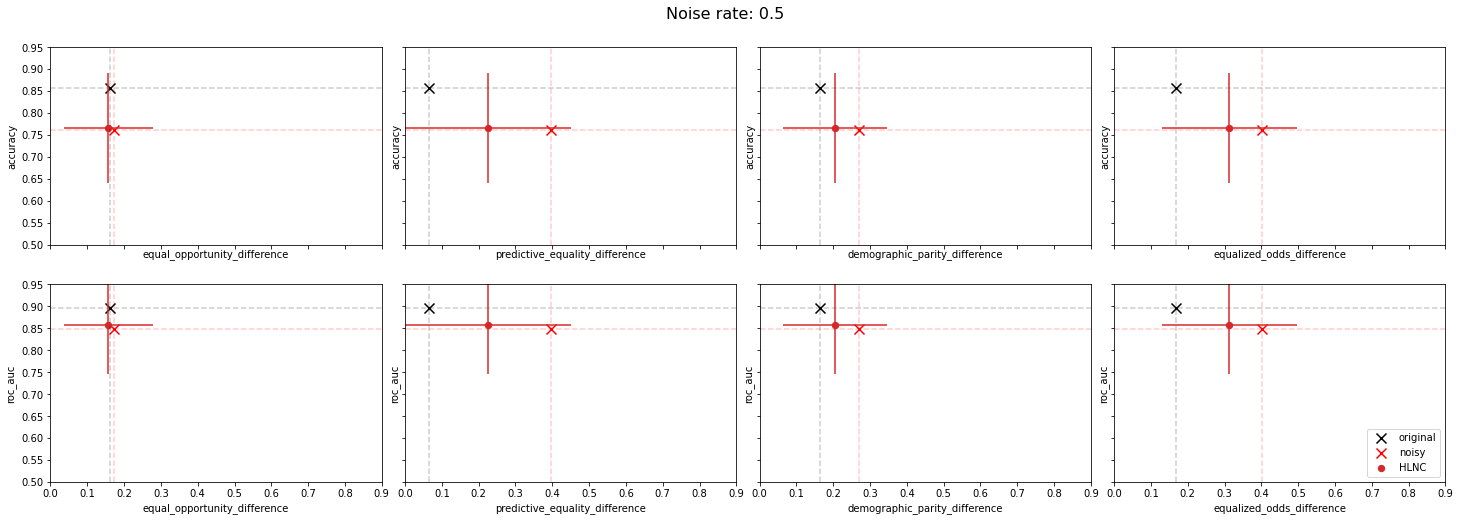

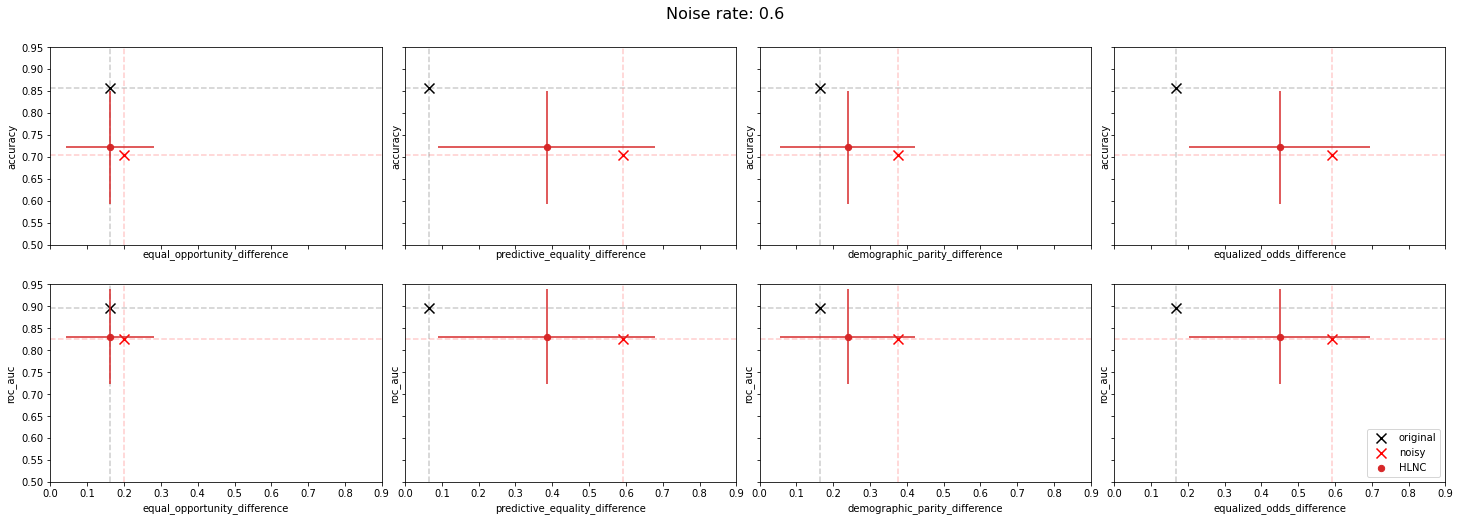

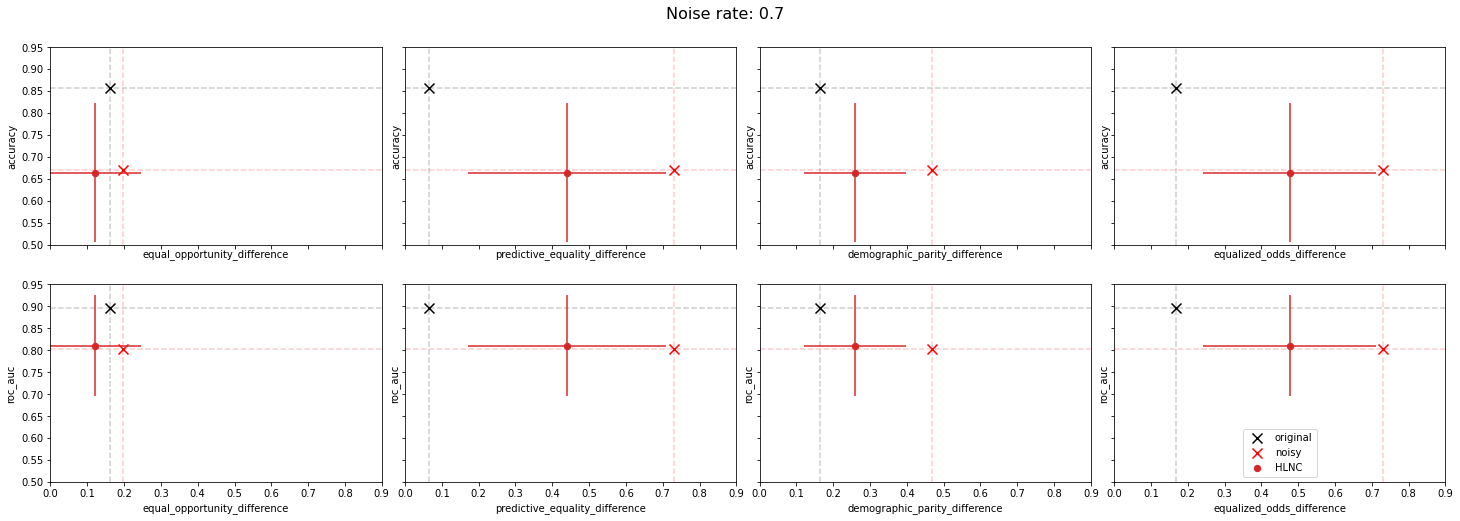

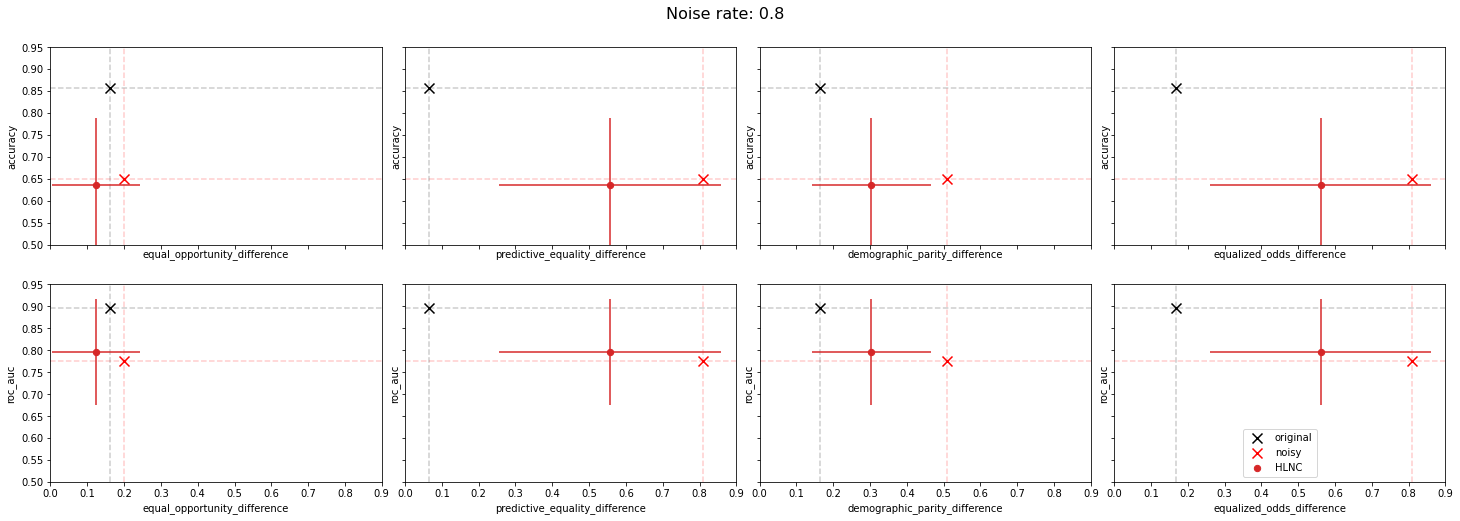

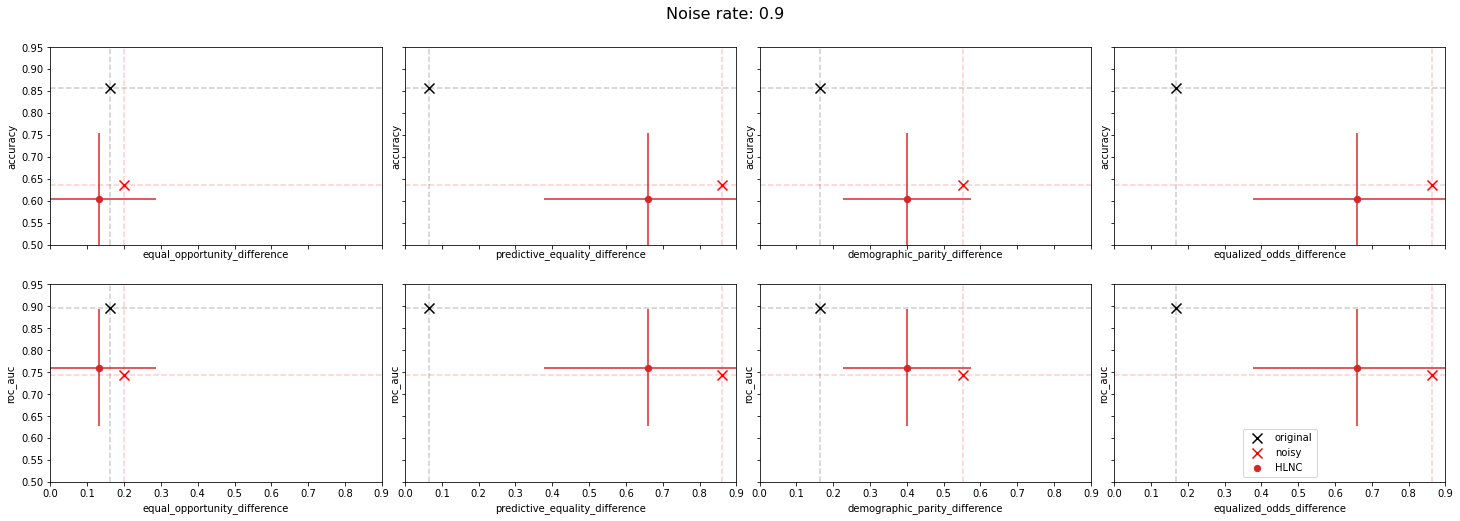

In [18]:
create_trade_off_gif('bias', 'original', ['HLNC'], experiments, runs, xlimit=(0, 0.9), ylimit=(0.5, 0.95))

# Balanced bias

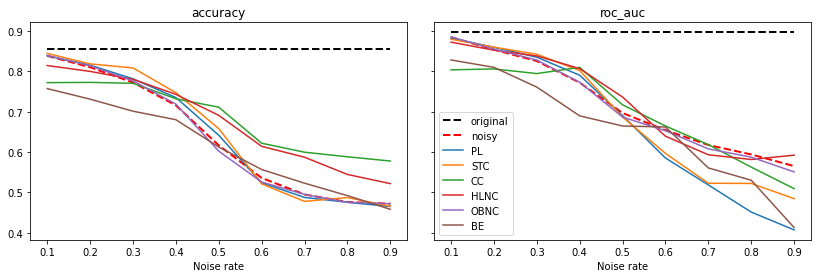

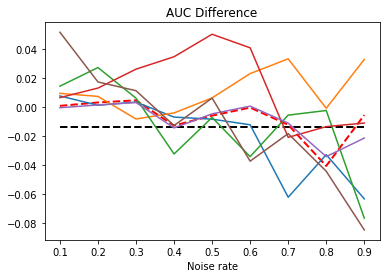

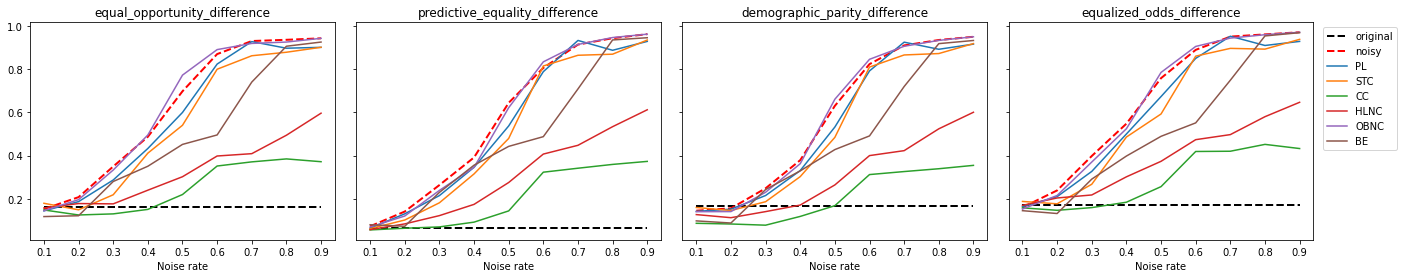

In [13]:
show_all_metrics_pred('balanced_bias', 'original', algorithms, experiments, runs)
show_metric_aggregated('balanced_bias', 'original', 'auc_difference', plt.gca(), f'AUC Difference', algorithms, experiments, runs)
show_all_metrics_fair('balanced_bias', 'original', algorithms, experiments, runs)

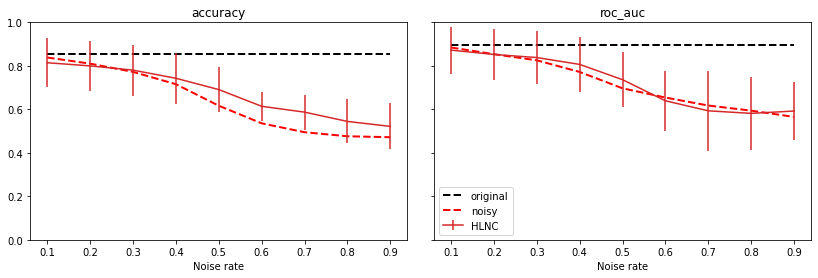

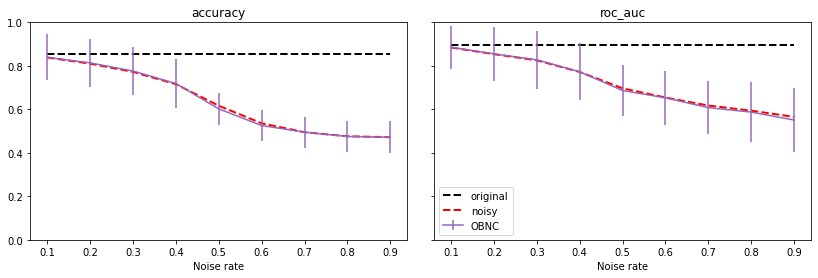

In [11]:
for alg in ['HLNC', 'OBNC']:
    show_all_metrics_pred('balanced_bias', 'original', [alg], experiments, runs, True)

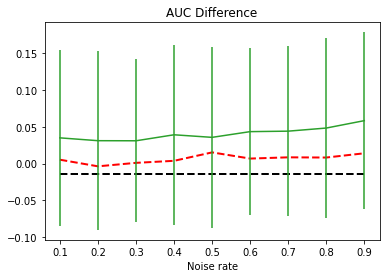

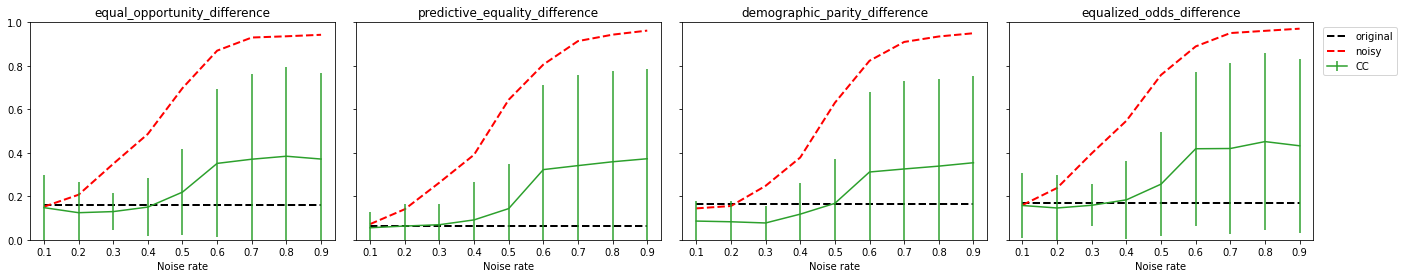

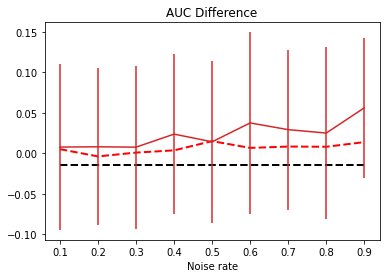

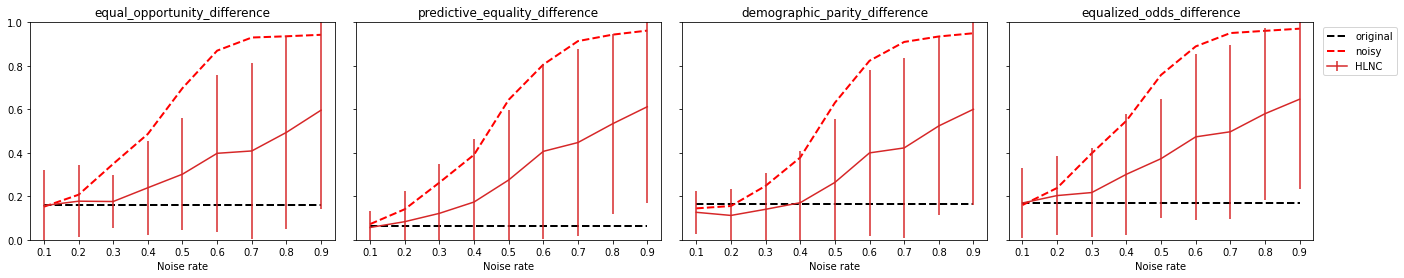

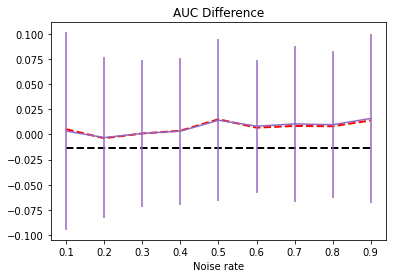

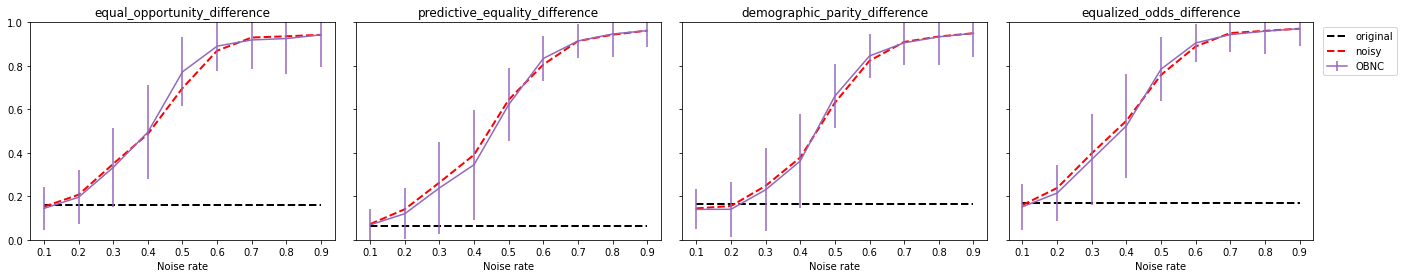

In [12]:
for alg in ['CC','HLNC','OBNC']:
    show_metric_aggregated('bias', 'original', 'auc_difference', plt.gca(), f'AUC Difference', [alg], experiments, runs)
    show_all_metrics_fair('balanced_bias', 'original', [alg], experiments, runs, True)

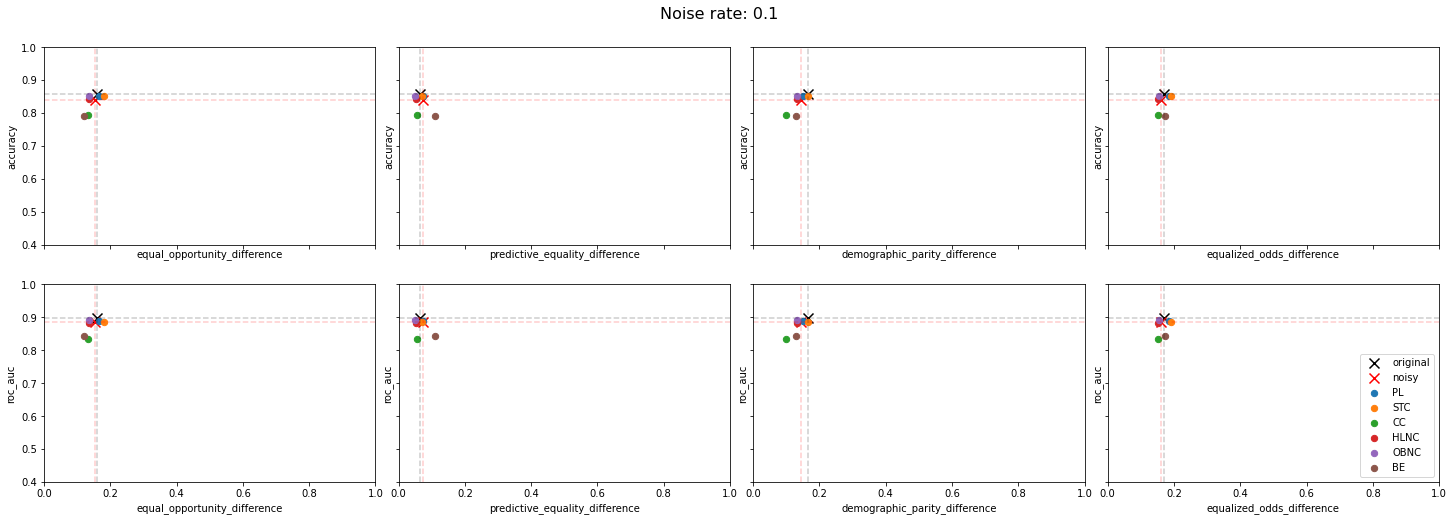

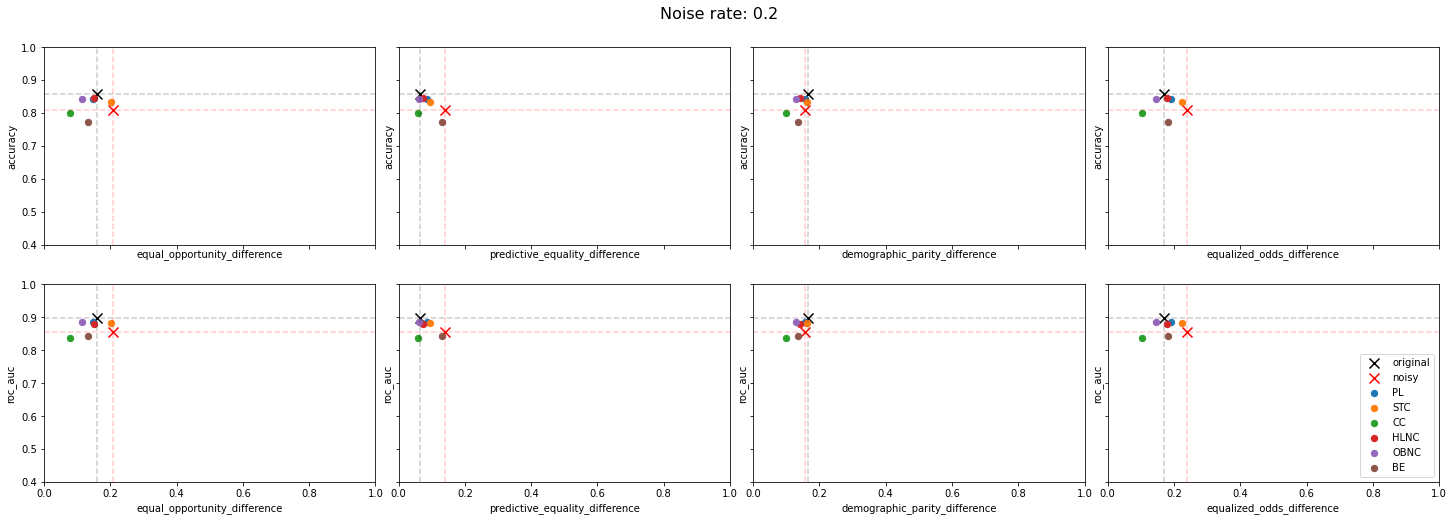

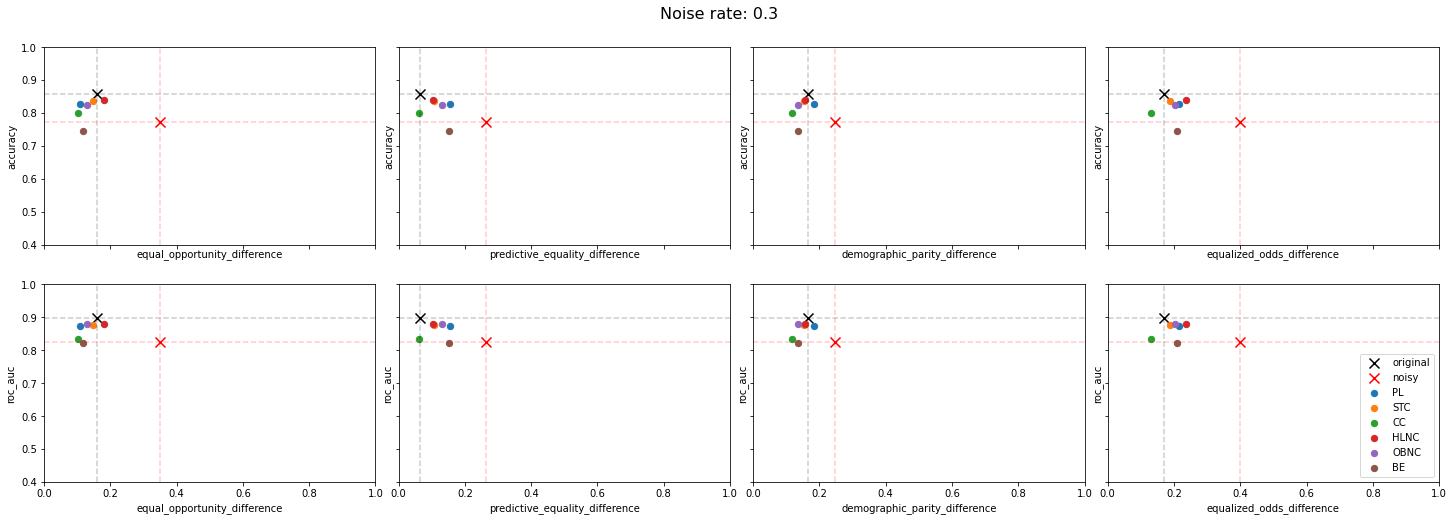

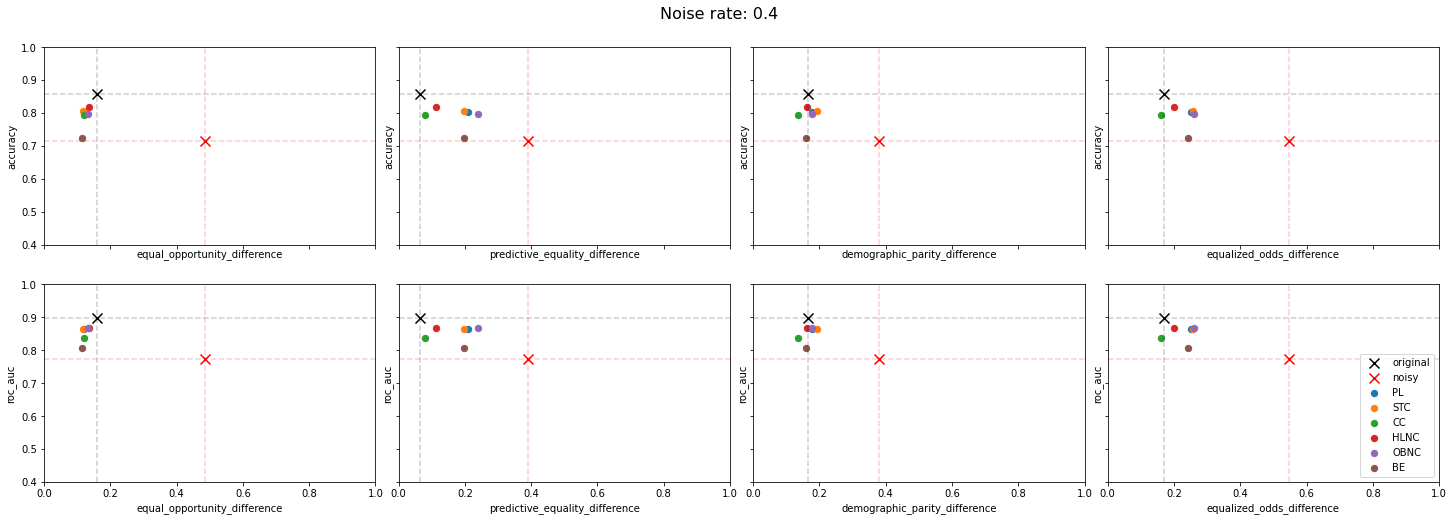

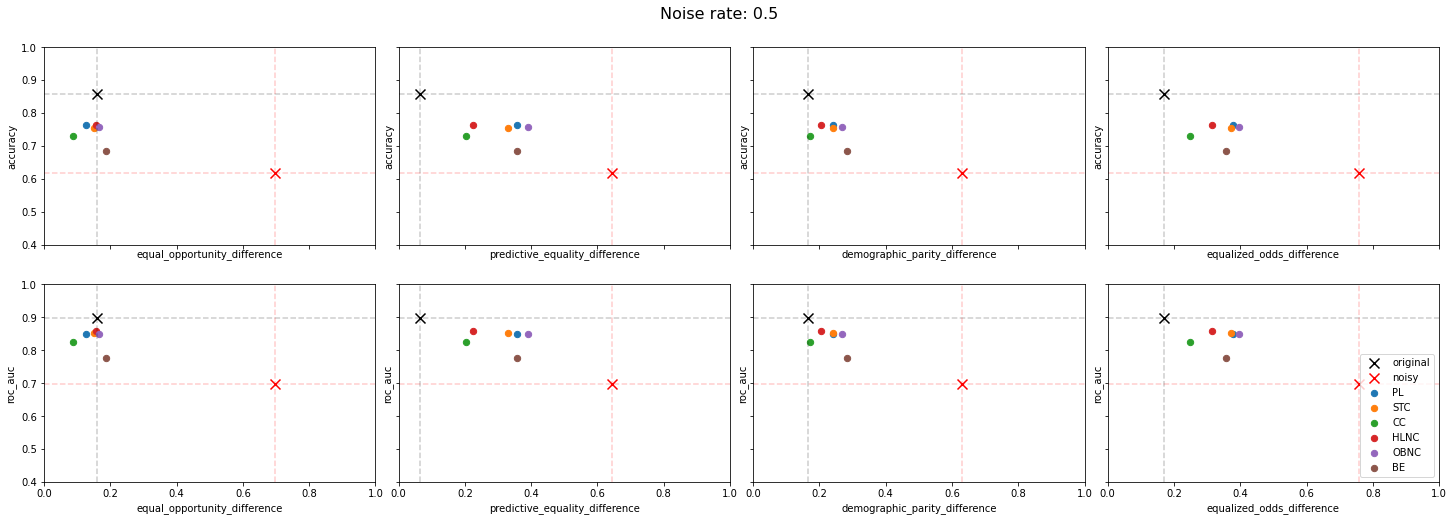

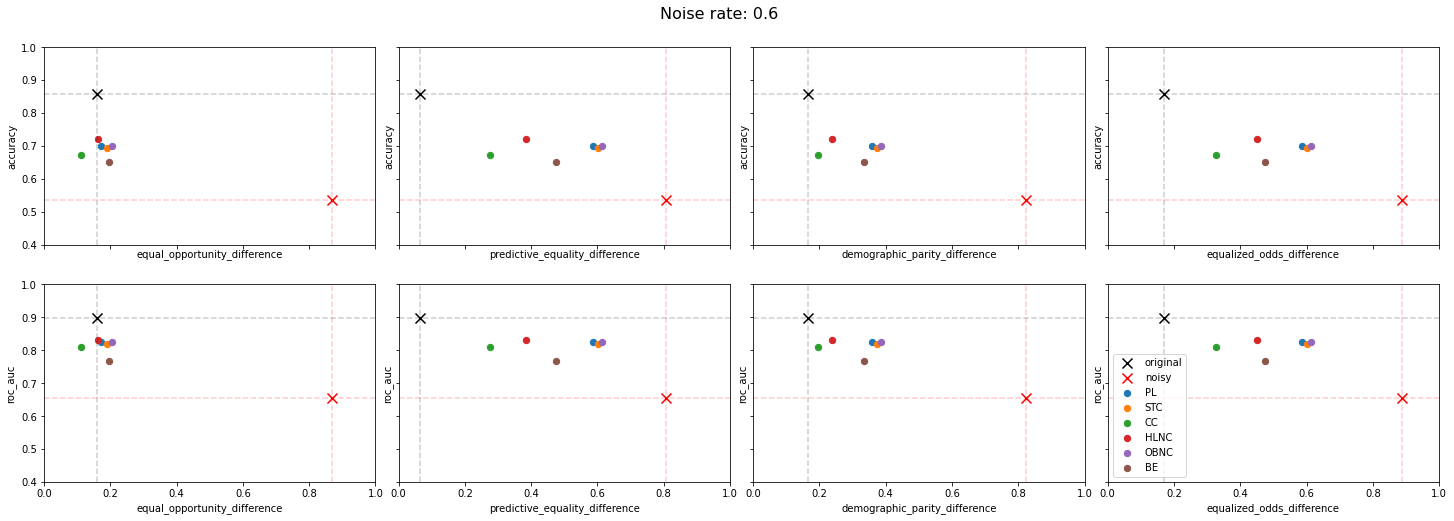

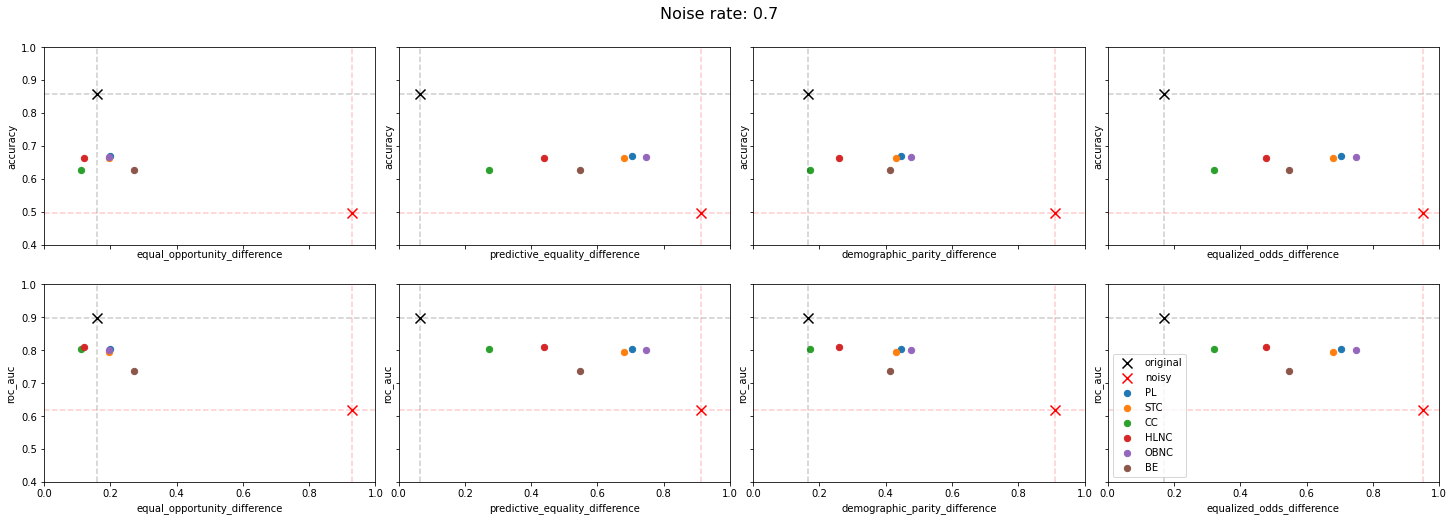

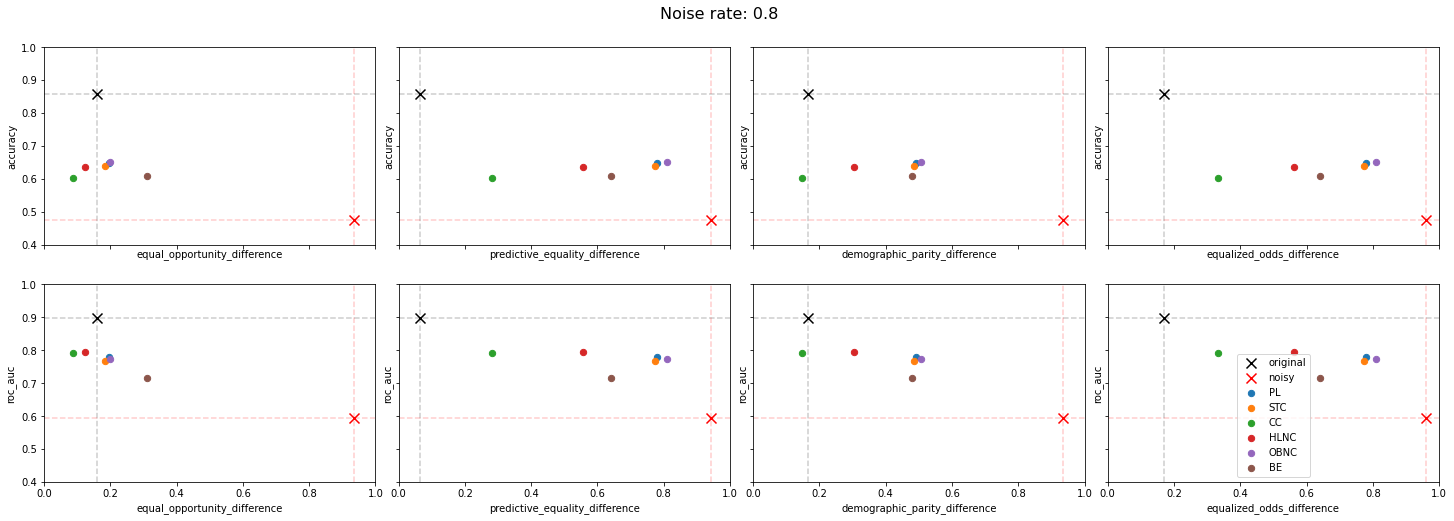

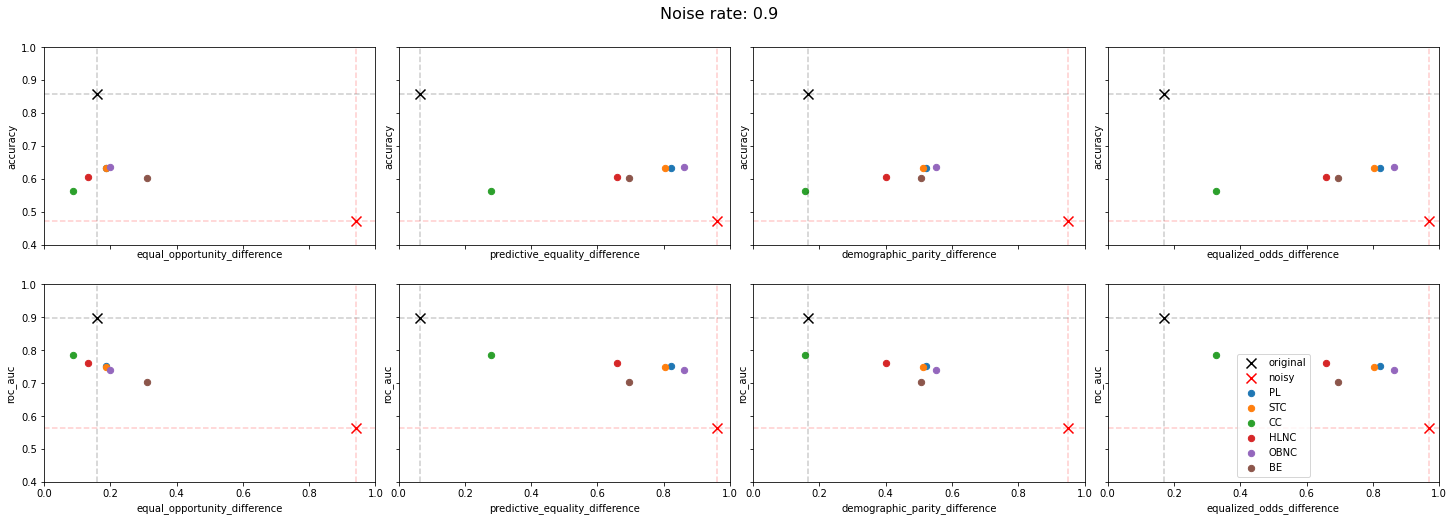

In [19]:
create_trade_off_gif('balanced_bias', 'original', algorithms, experiments, runs, xlimit=[0, 1], ylimit=[0.4, 1])

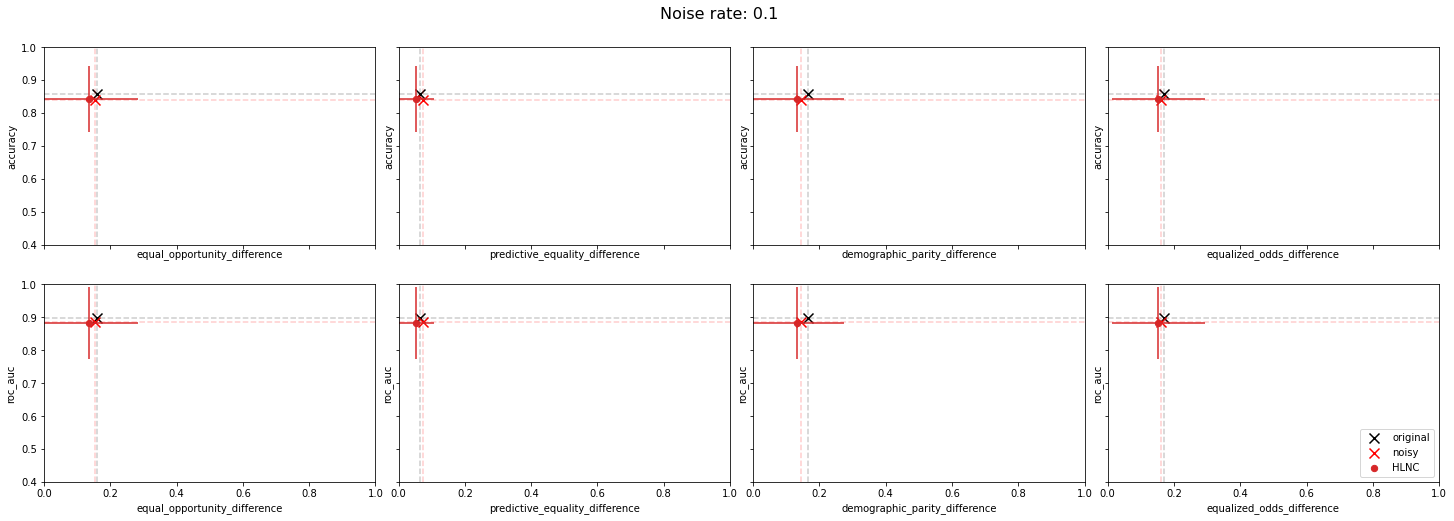

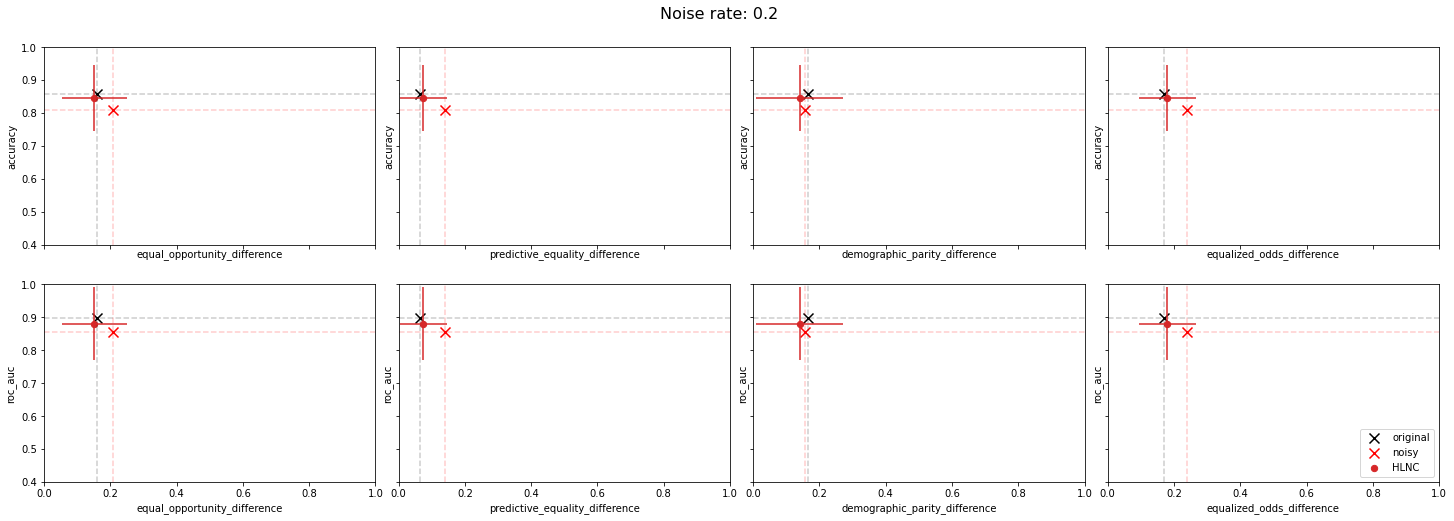

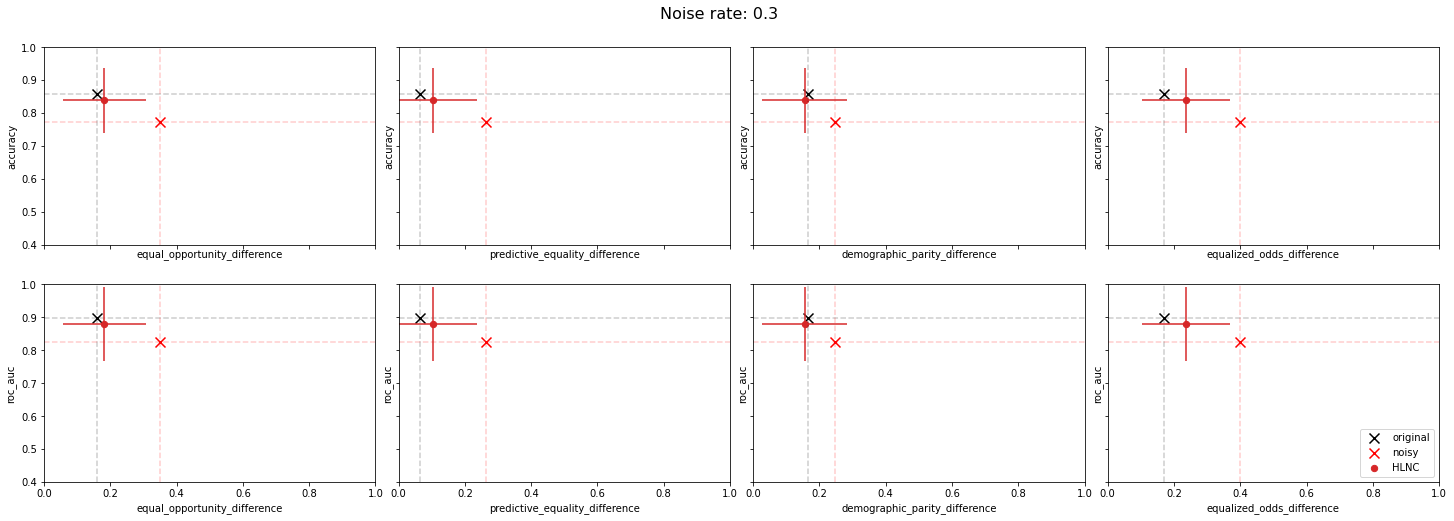

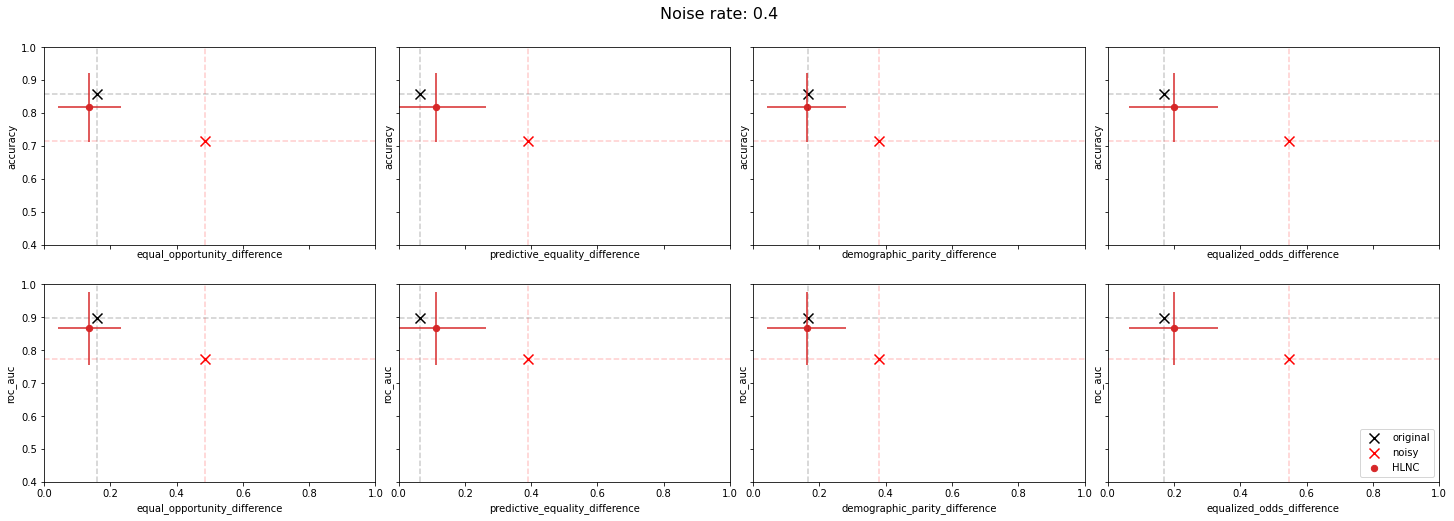

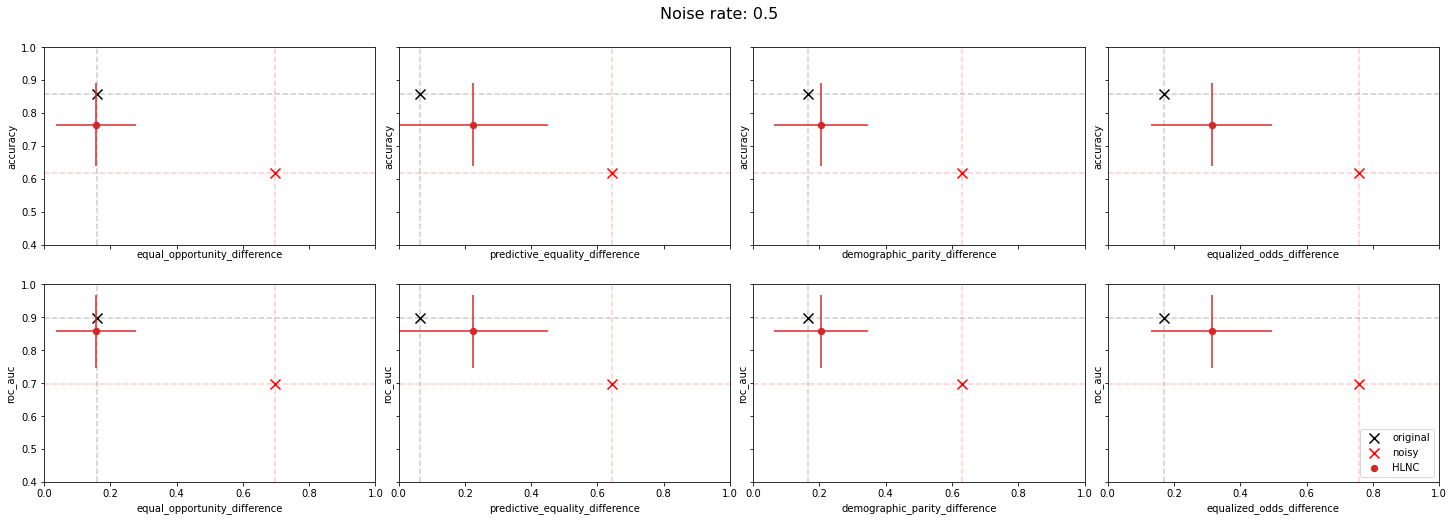

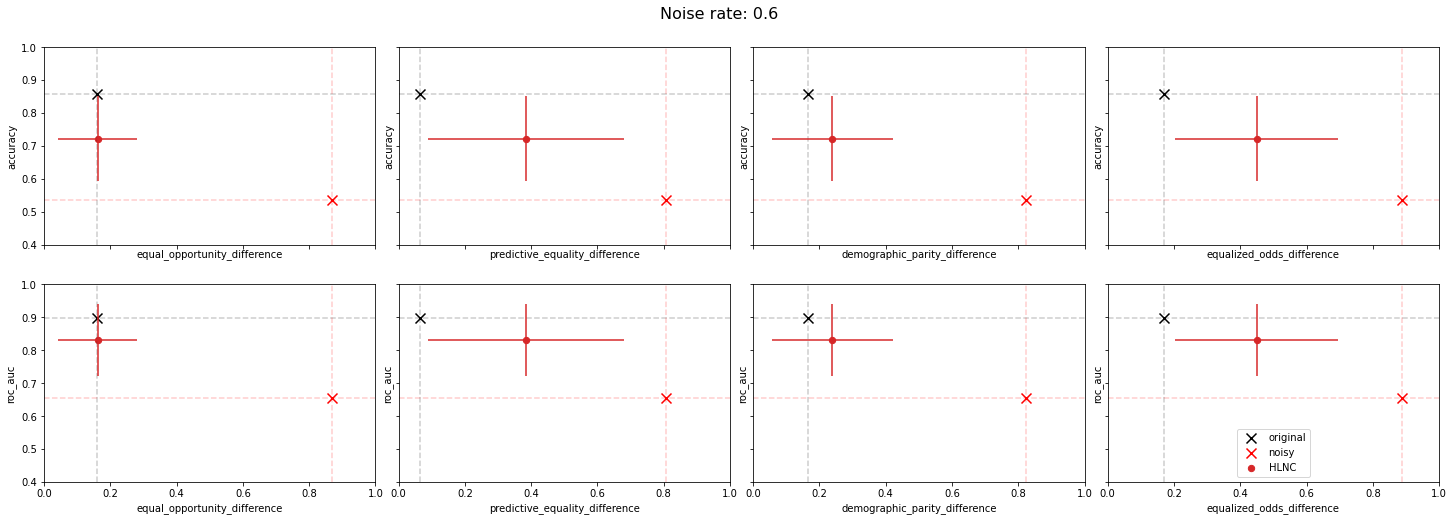

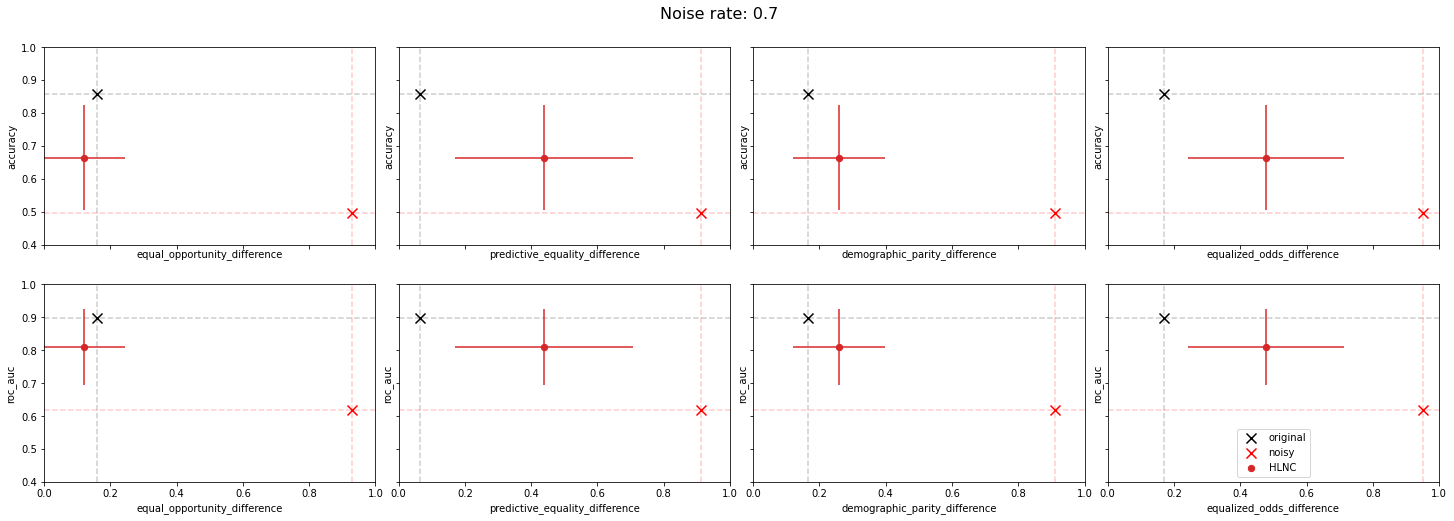

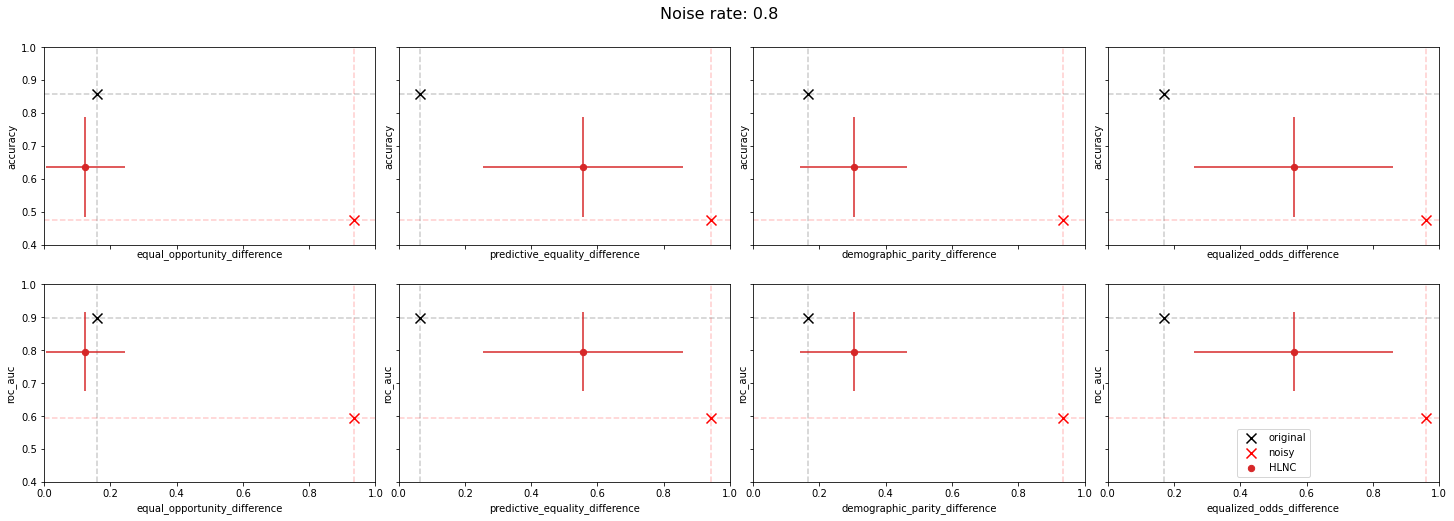

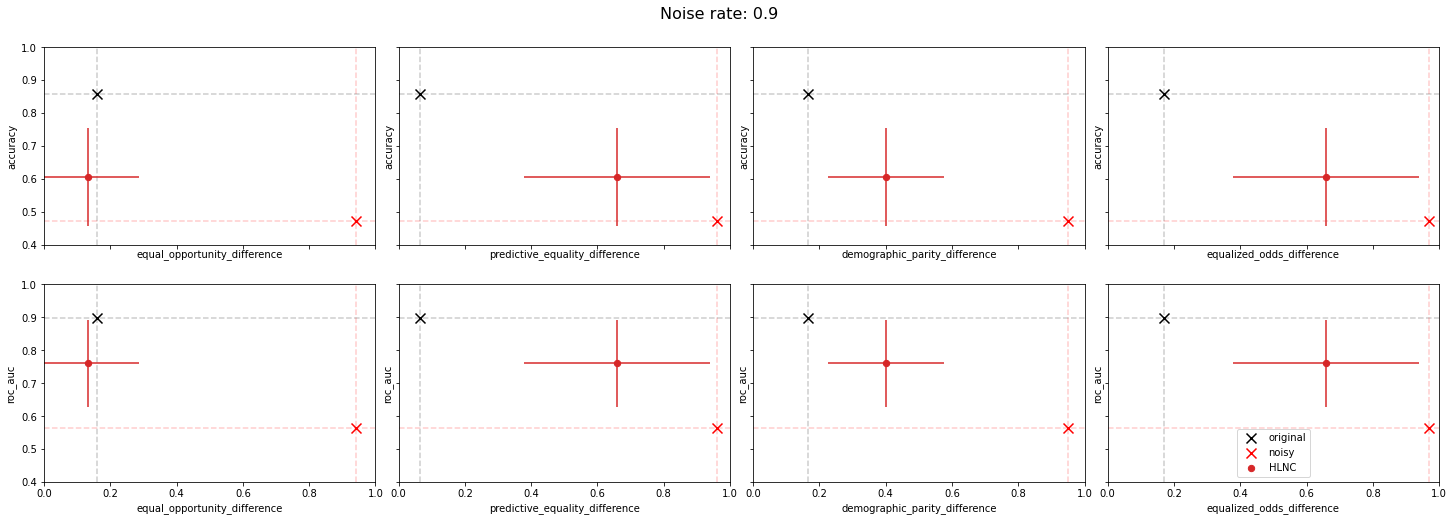

In [20]:
create_trade_off_gif('balanced_bias', 'original', ['HLNC'], experiments, runs, xlimit=[0, 1], ylimit=[0.4, 1])

# Comparing noise types

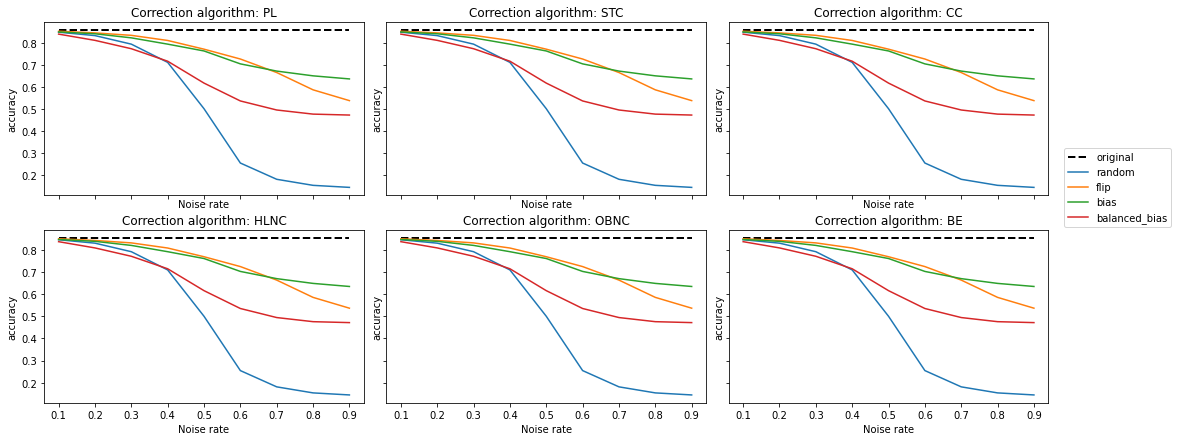

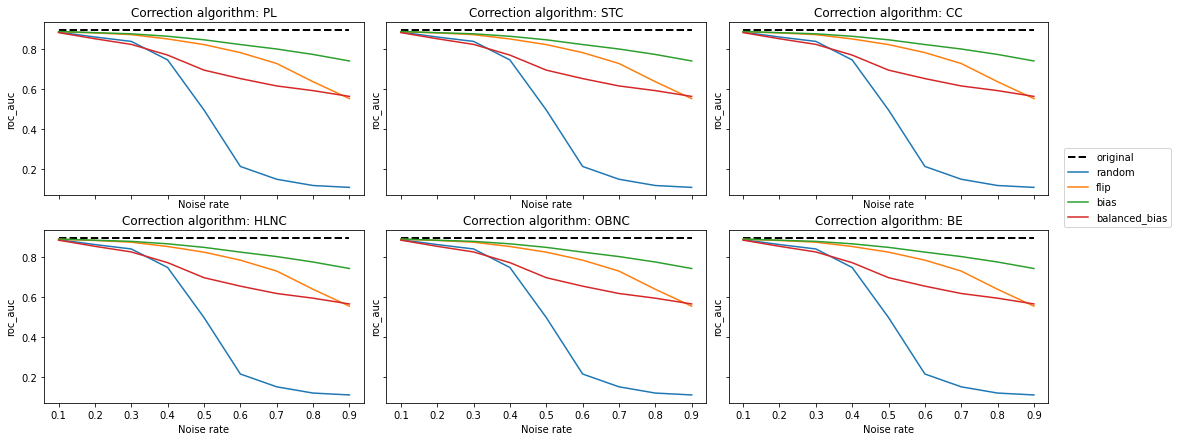

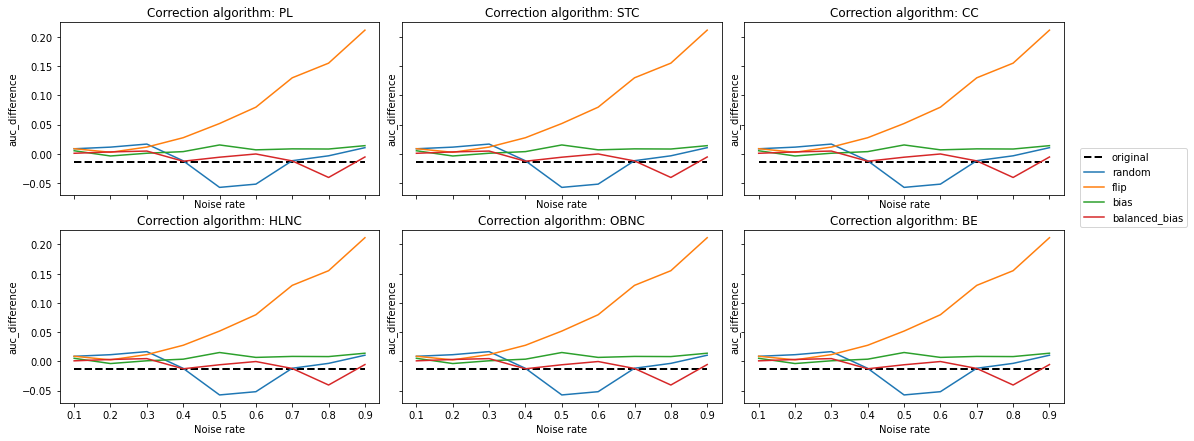

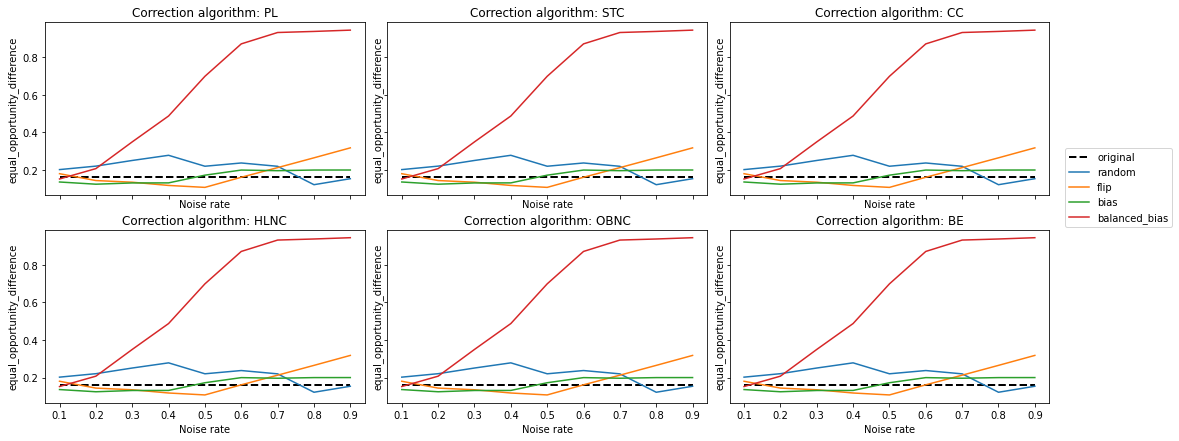

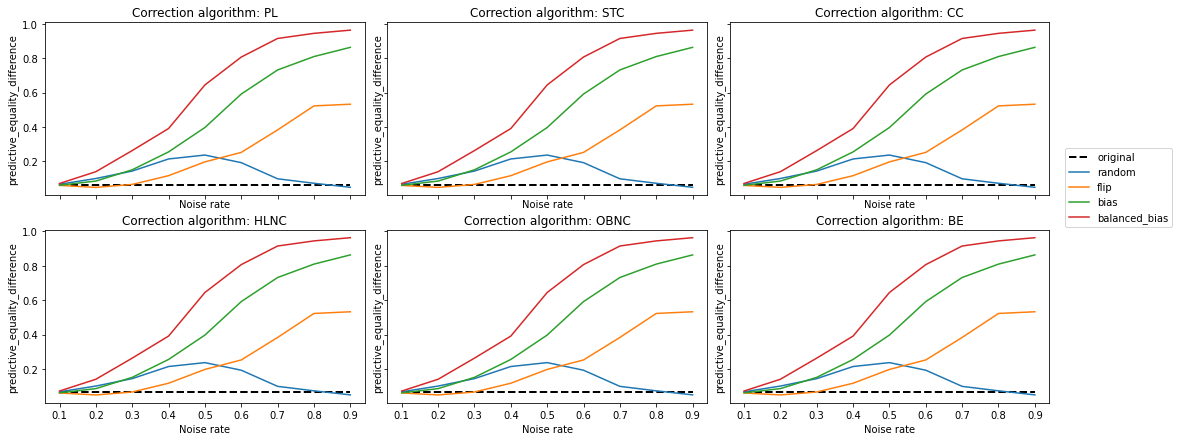

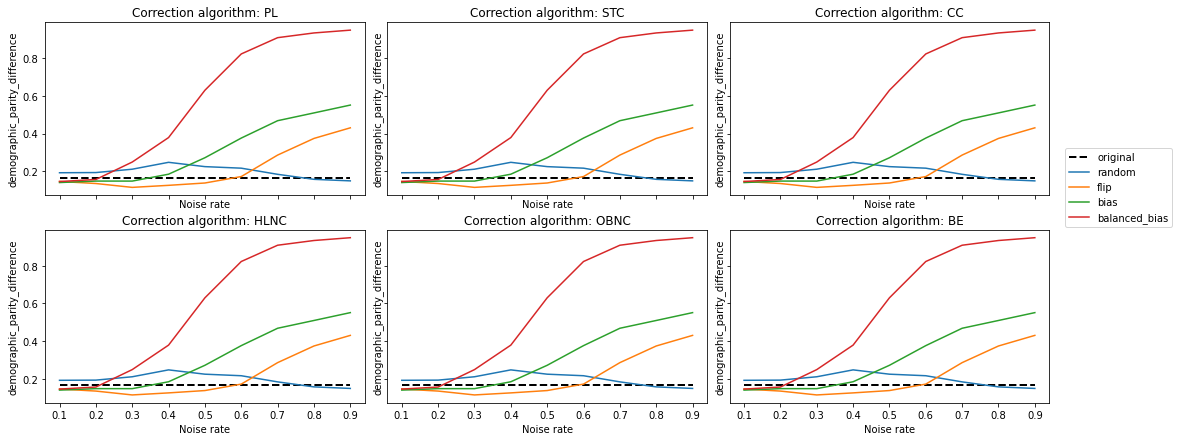

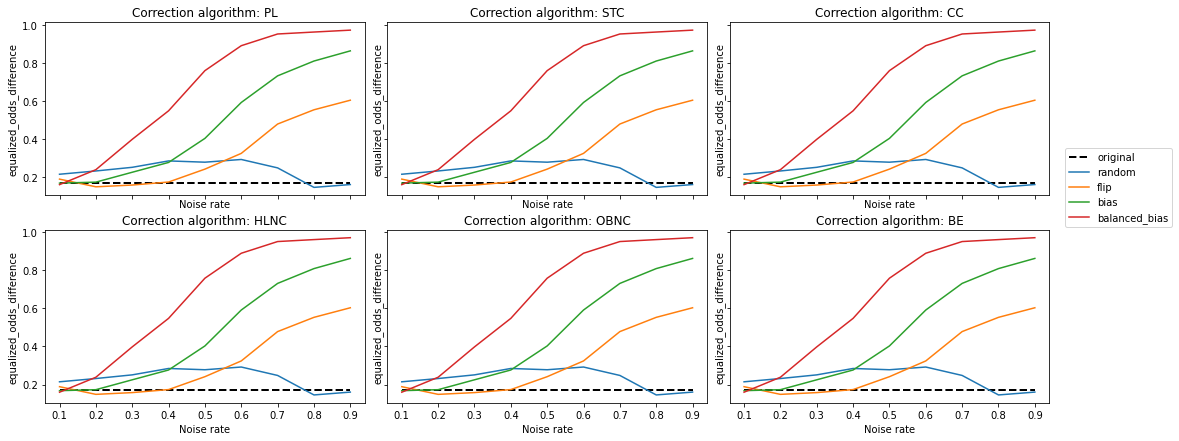

In [16]:
for metric in metrics:
    show_metric_alg('original', metric, algorithms, noise_types, experiments, runs)

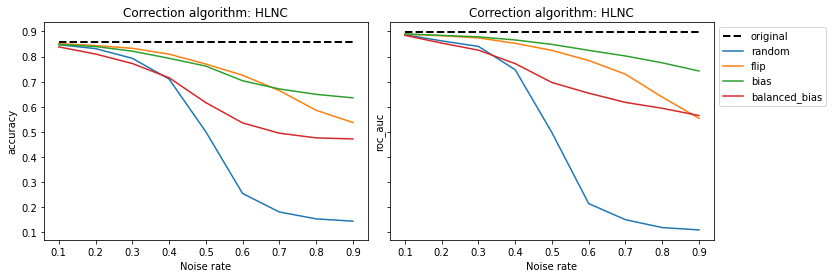

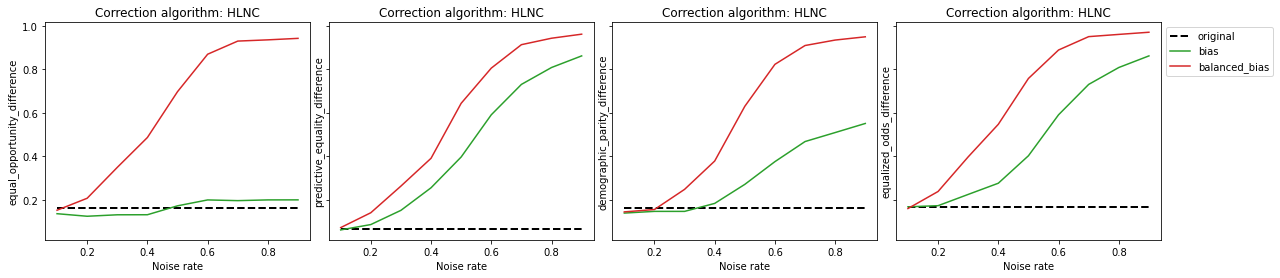

In [17]:
show_pred_metrics('original', 'HLNC', noise_types, experiments, runs)
show_fair_metrics('original', 'HLNC', experiments, runs)